In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

Lets begin by examining the amount of energy produced from renewable sources

In [2]:
renewable = pd.read_csv('energy_renewable.csv', parse_dates=['date'])
renewable

date  energy_mwh
0     2020-11-30 00:00:00         150
1     2020-11-30 01:00:00         144
2     2020-11-30 02:00:00         178
3     2020-11-30 03:00:00         257
4     2020-11-30 04:00:00         277
...                   ...         ...
19025 2023-01-31 19:00:00        2342
19026 2023-01-31 20:00:00        2241
19027 2023-01-31 21:00:00        1998
19028 2023-01-31 22:00:00        1944
19029 2023-01-31 23:00:00        1922

[19030 rows x 2 columns]

In [3]:
renewable['year'] = renewable['date'].dt.year
renewable['day'] = pd.to_datetime(renewable['date']).dt.day
renewable['month'] = pd.to_datetime(renewable['date']).dt.month
renewable['hour'] = pd.to_datetime(renewable['date']).dt.hour

renewable = renewable[renewable.columns[1:]]

In [4]:
mean_energy_per_day = renewable.groupby(['year', 'month', 'day'])['energy_mwh'].mean().reset_index()

# Rename the column for clarity
mean_energy_per_day.rename(columns={'energy_mwh': 'mean_energy_mwh'}, inplace=True)


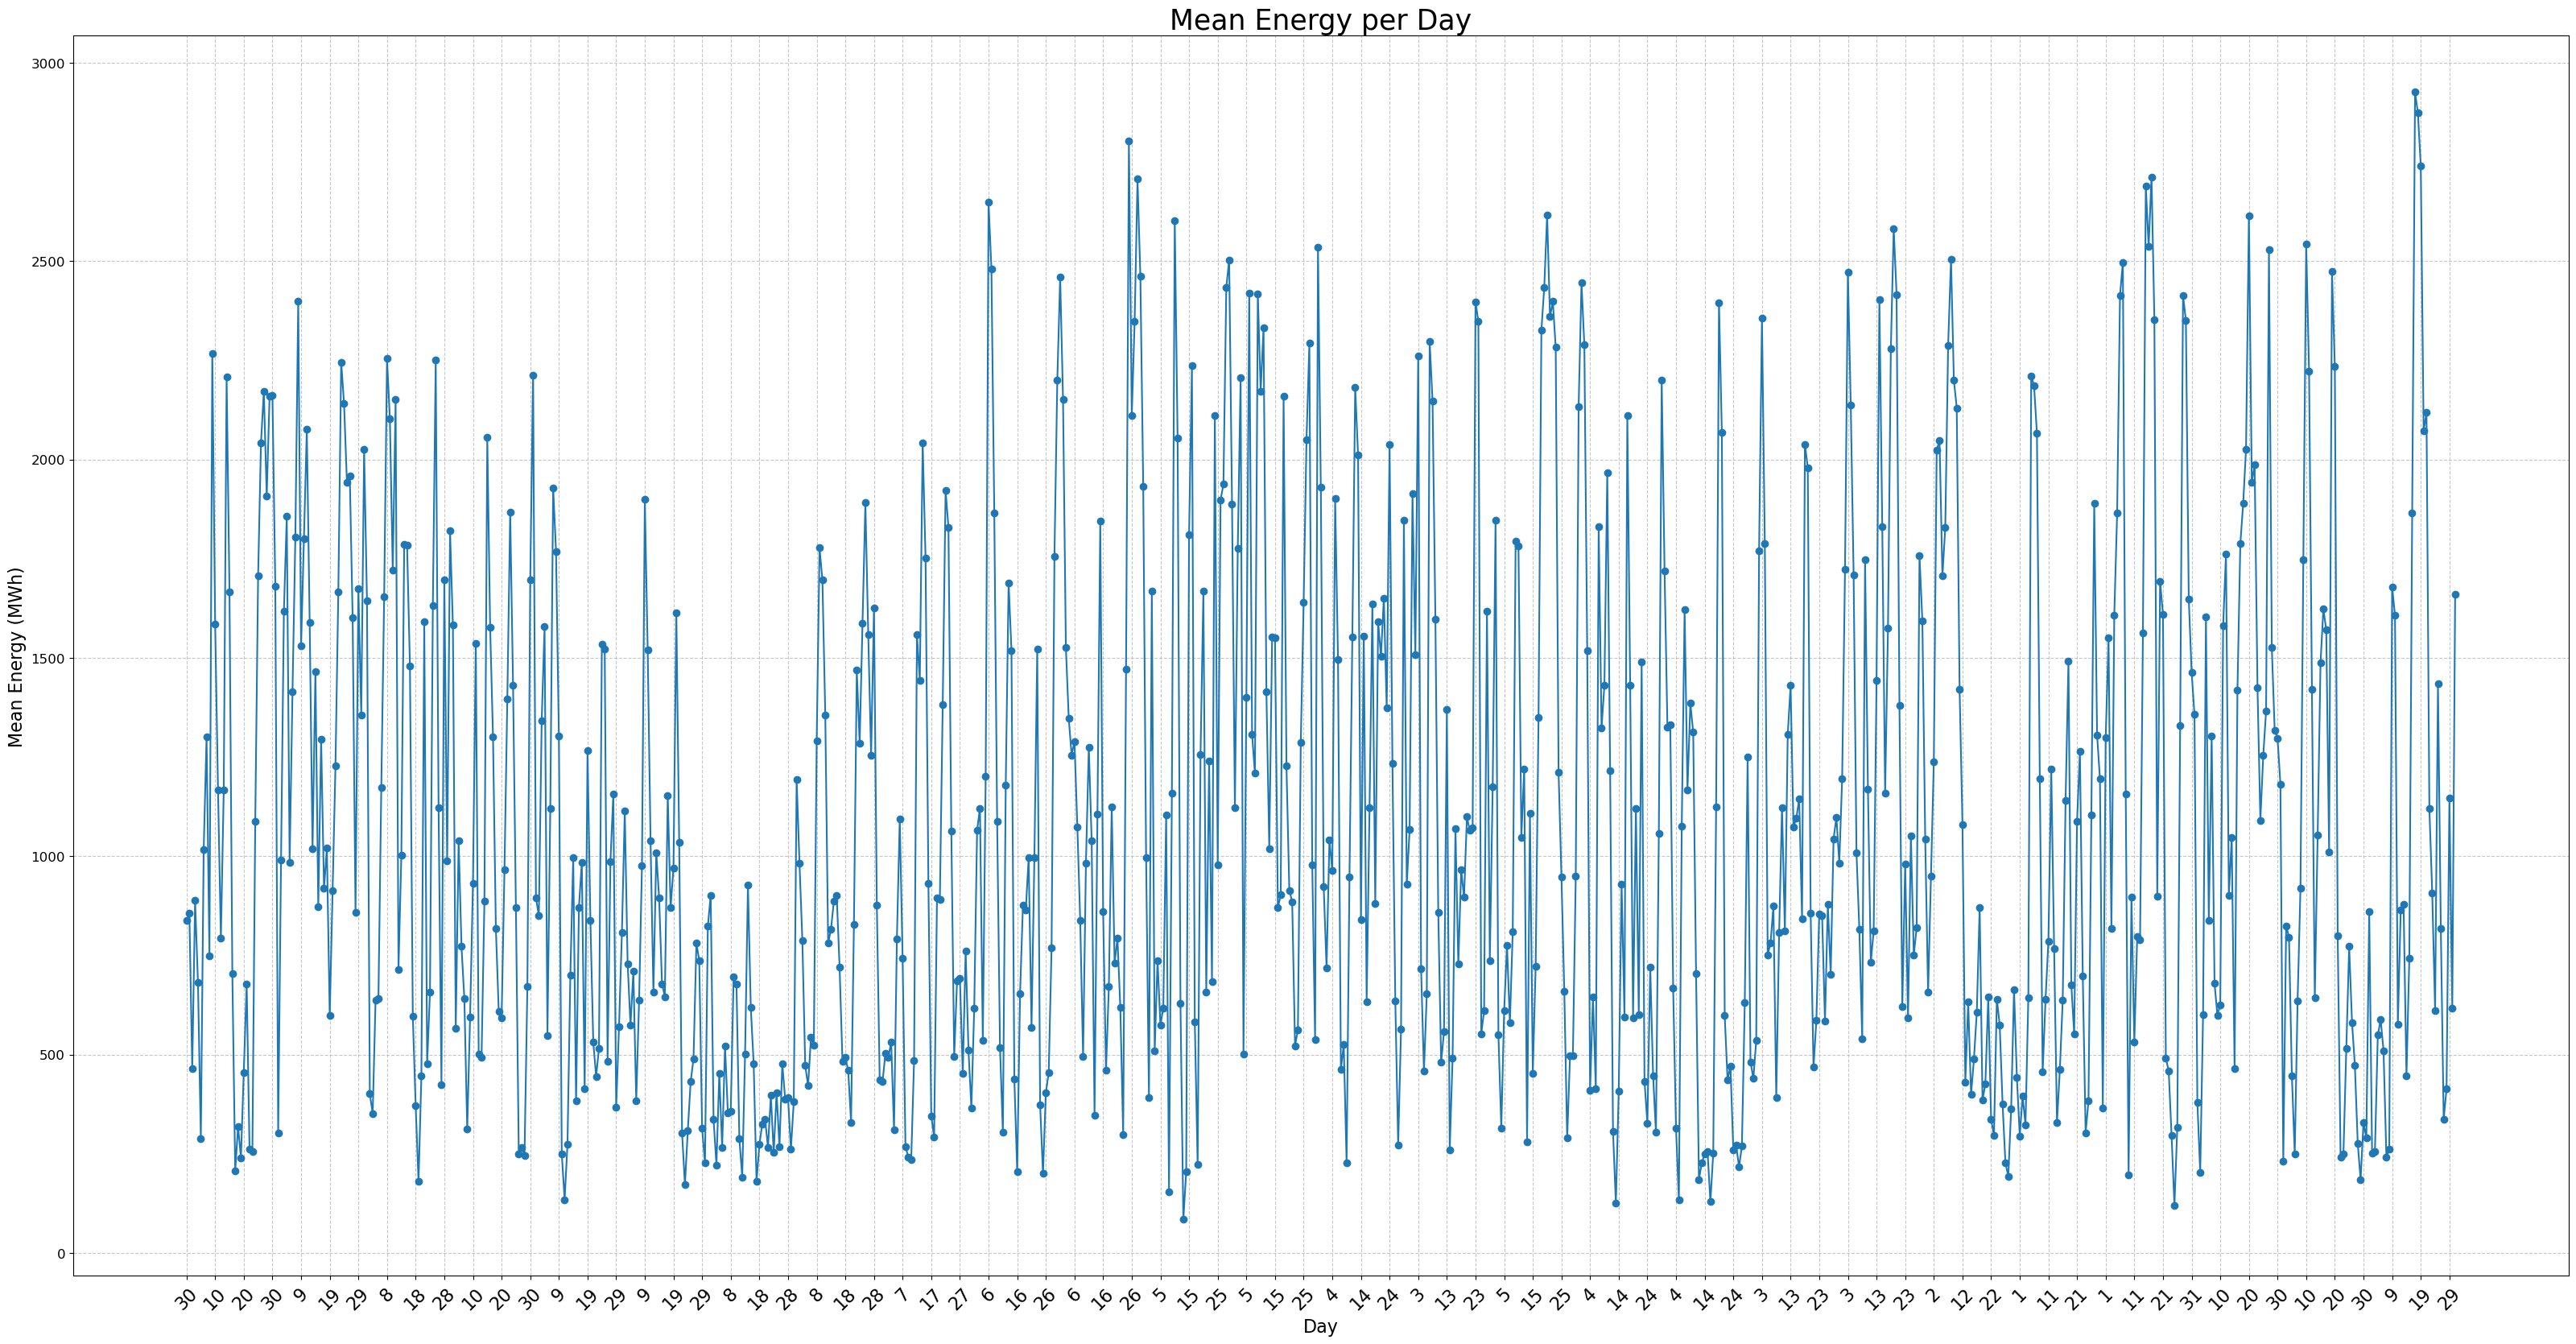

In [5]:
plt.figure(figsize=(40, 20))  
plt.plot(mean_energy_per_day.index, mean_energy_per_day['mean_energy_mwh'], marker='o')

# Adding titles and labels
plt.title('Mean Energy per Day', fontsize=25)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Mean Energy (MWh)', fontsize=16)

# Set x-ticks to show every 5th imporve readability
ticks = mean_energy_per_day.index[::10]  # Take every 5th index
labels = mean_energy_per_day['day'].iloc[::10]  # Corresponding labels

plt.xticks(
    ticks=ticks,  # Positions for the ticks
    labels=labels,  # Labels for the ticks
    rotation=45,  # Rotate labels for better readability
    fontsize=16

)

plt.yticks(fontsize=12)

# Display grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Smoothen the curve by calculating the rolling average for every 25 entries 

In [6]:
rolling_group = mean_energy_per_day.rolling(window=30, step=1, min_periods=1).mean()
rolling_group

year      month        day  mean_energy_mwh
0    2020.000000  11.000000  30.000000       837.333333
1    2020.000000  11.500000  15.500000       846.666667
2    2020.000000  11.666667  11.000000       719.597222
3    2020.000000  11.750000   9.000000       761.750000
4    2020.000000  11.800000   8.000000       745.766667
..           ...        ...        ...              ...
788  2022.900000   2.100000  15.600000      1031.227778
789  2022.933333   1.733333  15.566667      1038.872222
790  2022.966667   1.366667  15.533333      1066.134722
791  2023.000000   1.000000  15.500000      1077.068056
792  2023.000000   1.000000  16.500000      1103.737500

[793 rows x 4 columns]

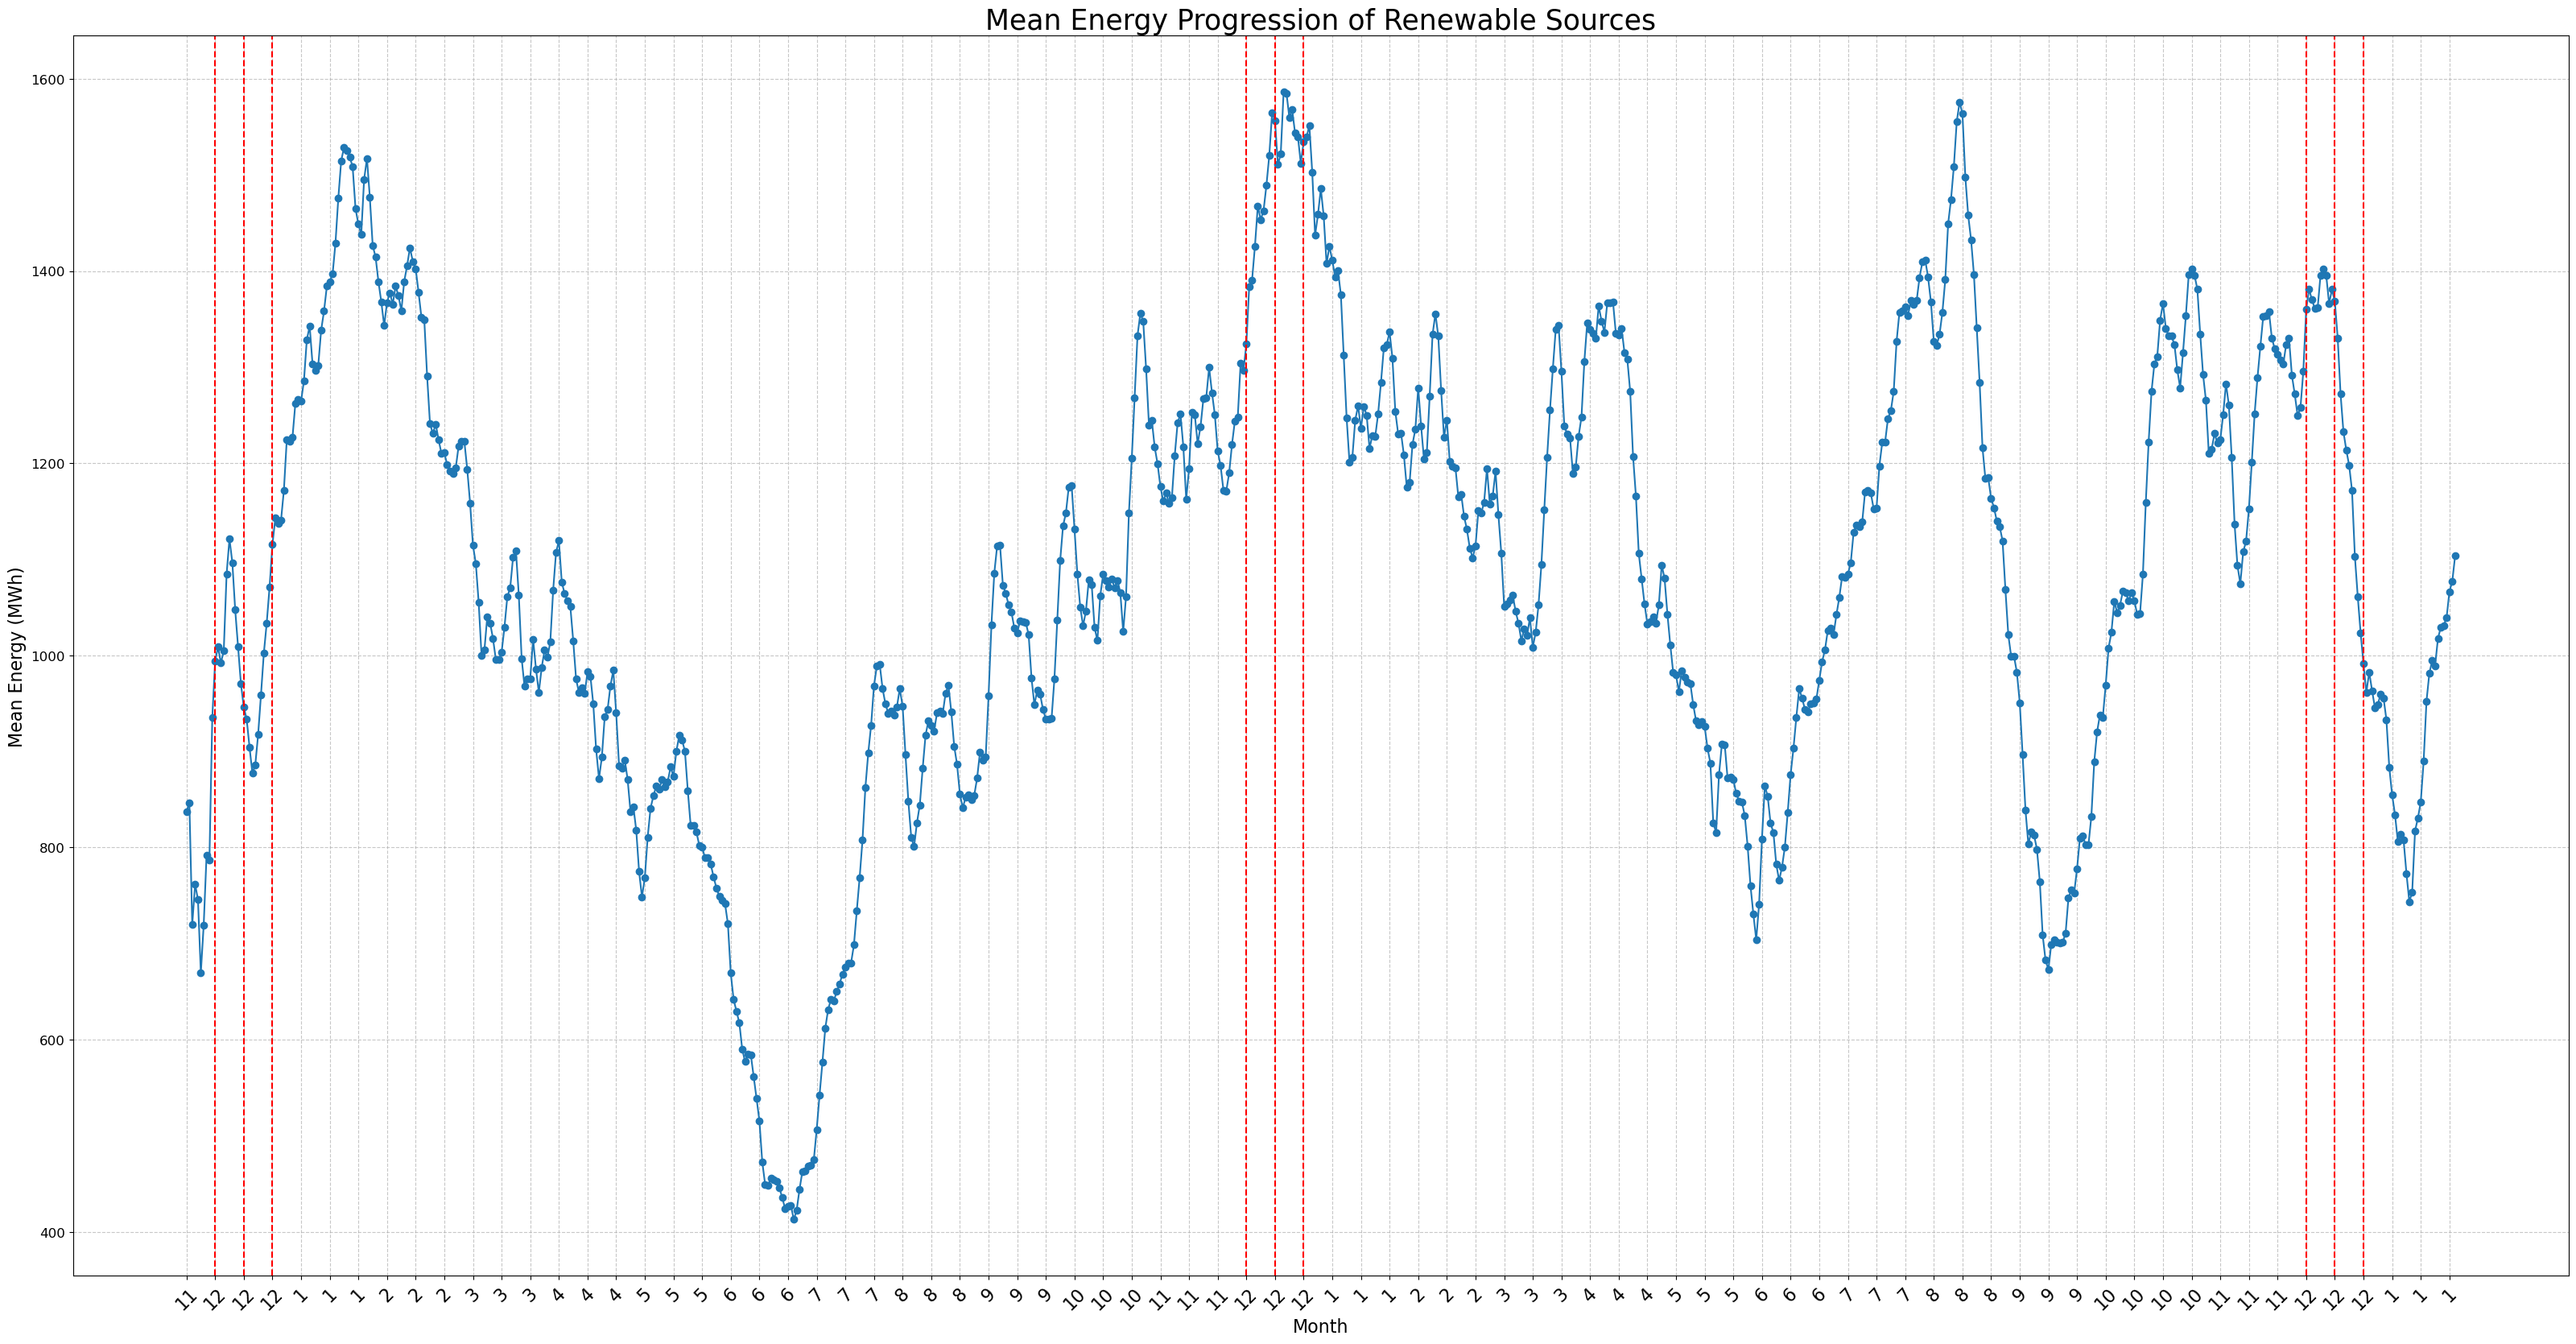

In [7]:
plt.figure(figsize=(40, 20))  # Adjust width and height as needed
plt.plot(rolling_group.index, rolling_group['mean_energy_mwh'], marker='o')

# Adding titles and labels
plt.title('Mean Energy Progression of Renewable Sources', fontsize=25)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Energy (MWh)', fontsize=16)

# Set x-ticks to show every 5th day
ticks = mean_energy_per_day.index[::10]  # Take every 10th index to avoind crouding the x-axis

labels = mean_energy_per_day['month'].iloc[::10]  # Corresponding labels

plt.xticks(
    ticks=ticks,  # Positions for the ticks
    labels=labels,  # Labels for the ticks
    rotation=45,  # Rotate labels for better readability
    fontsize=16
)

plt.yticks(fontsize=12)

# Draw vertical red lines for ticks with label '12'
for tick, label in zip(ticks, labels):
    if label == 12:
        plt.axvline(x=tick, color='red', linestyle='--', linewidth=1.5)

# Display grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.savefig('mean_energy_progression_rolling_30.png')
# Show the plot
plt.show()


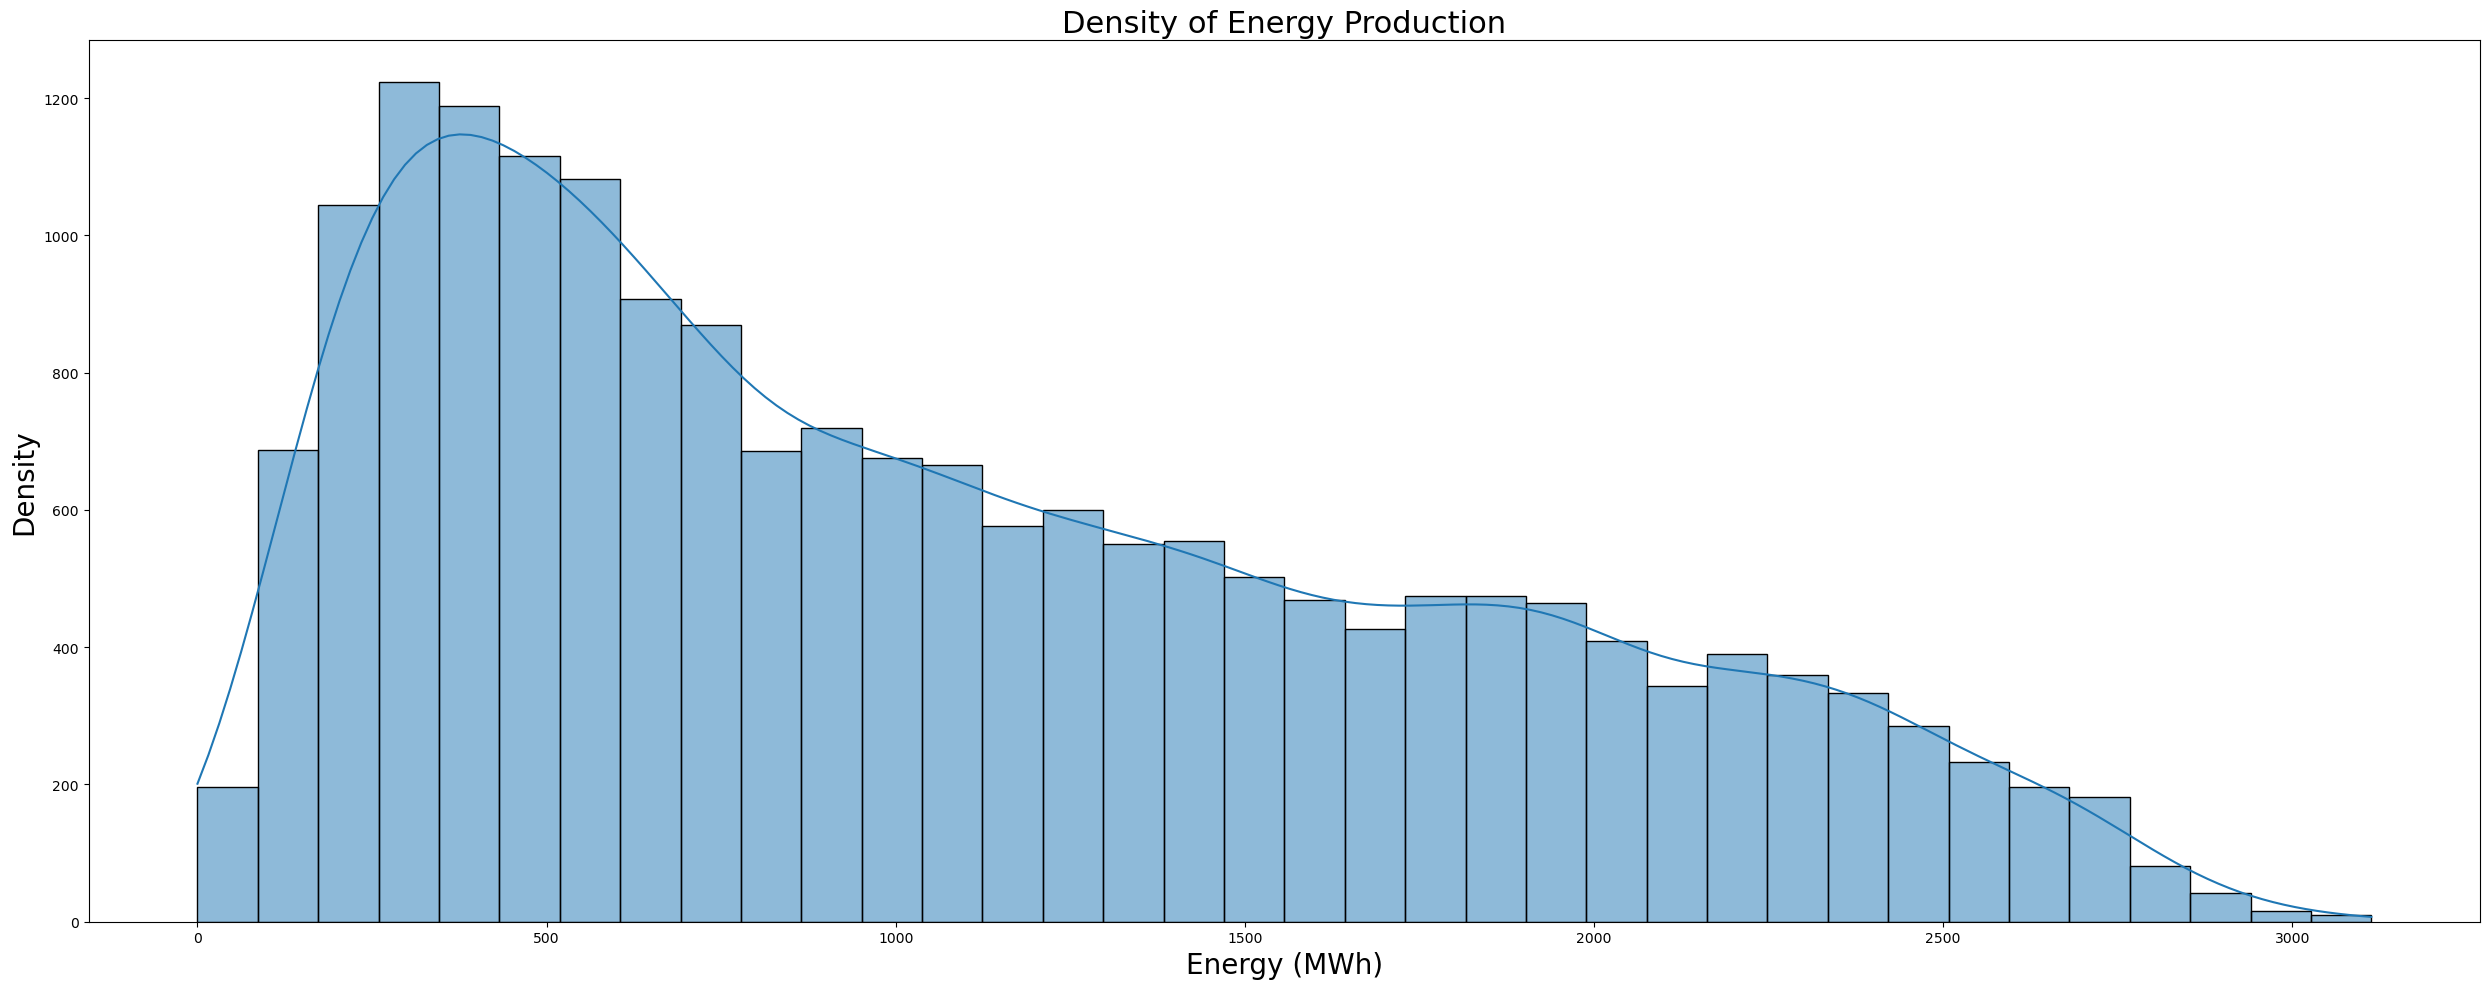

In [8]:
plt.figure(figsize=(25,10))
sns.histplot(renewable['energy_mwh'], fill=True, kde=True)

plt.title('Density of Energy Production')
plt.xlabel('Energy (MWh)')

plt.title('Density of Energy Production', fontsize=22)
plt.ylabel('Density', fontsize=20)
plt.xlabel('Energy (MWh)', fontsize=20)

plt.tight_layout()

plt.savefig('density_energy_hist.png')
plt.show()

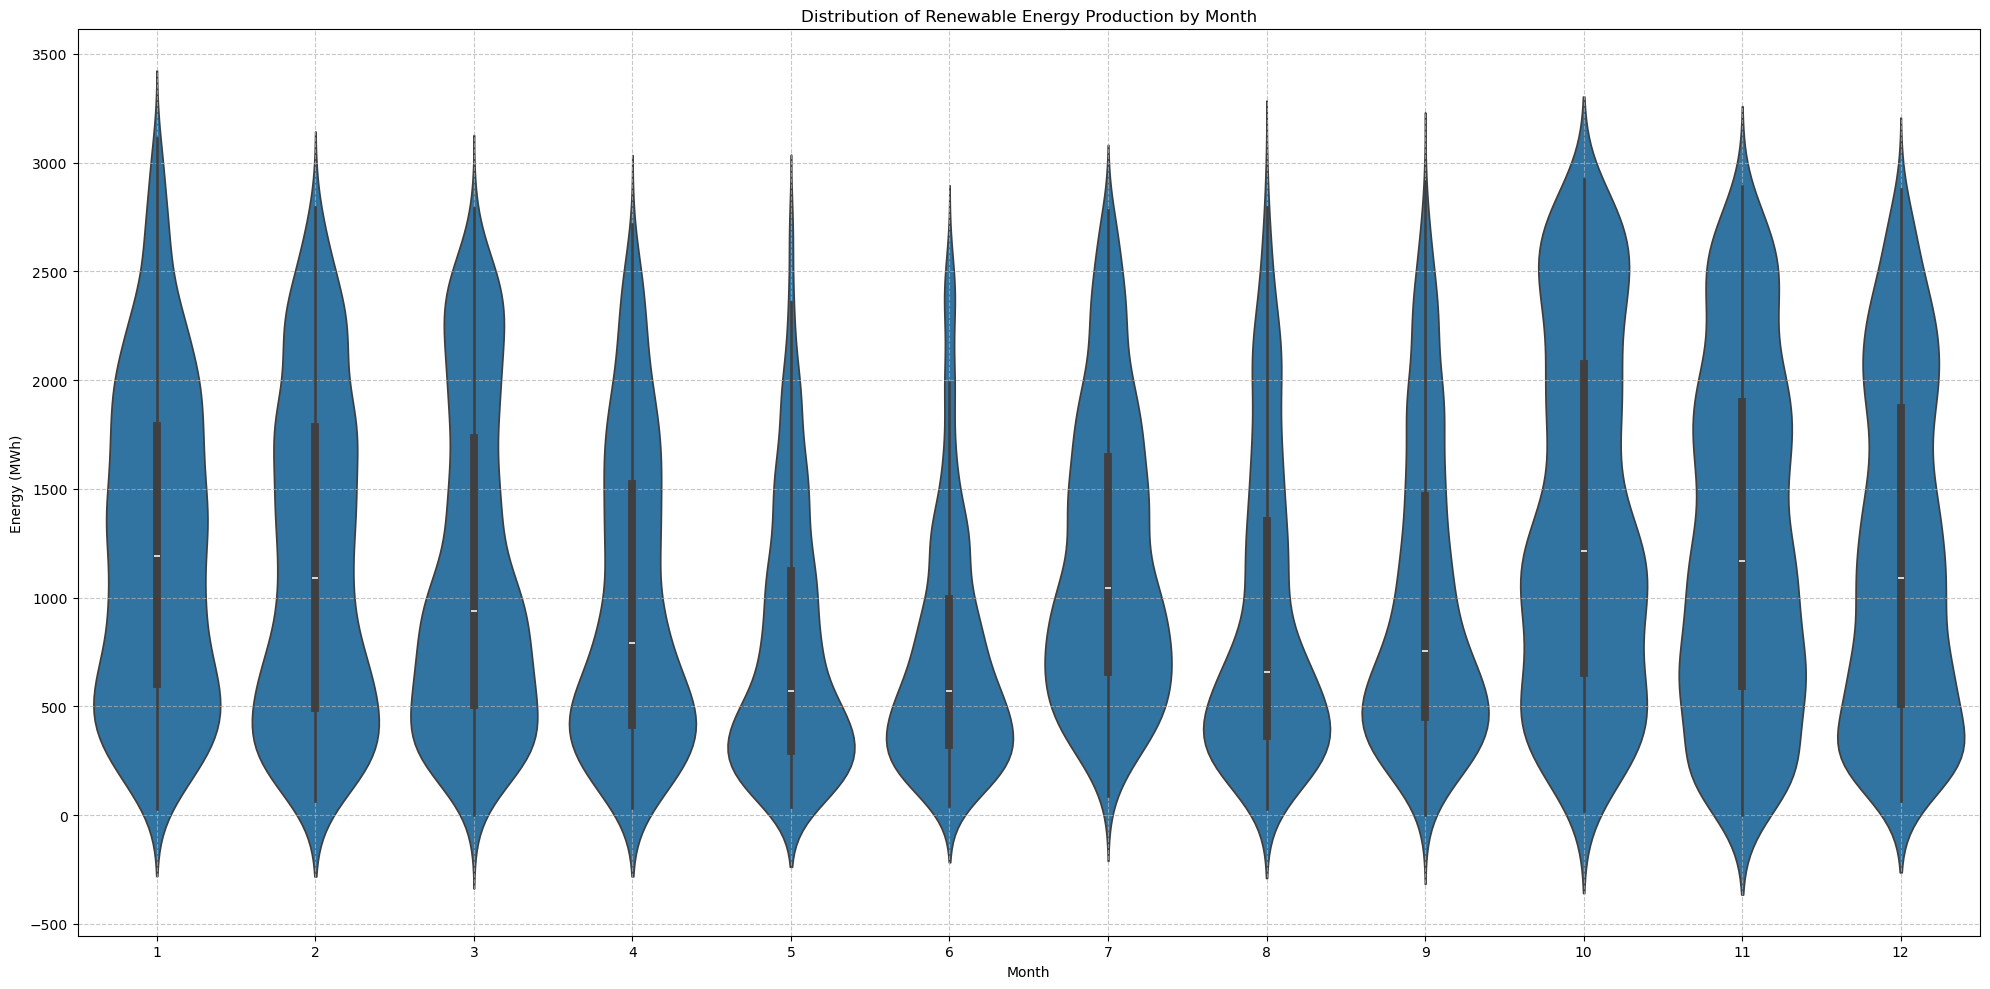

In [9]:
plt.figure(figsize=(20,10))
sns.violinplot(x='month', y='energy_mwh', data=renewable, density_norm='width')
plt.title('Distribution of Renewable Energy Production by Month')
plt.xlabel('Month')
plt.ylabel('Energy (MWh)')

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('energy_violin.png')

plt.show()

A violin plot whows us the drop of energy production during Spring months and the increase during Winter

Now let's examine the enrgy production from various other sources 

In [6]:
energy = pd.read_csv('daily_energy_balance.csv', date_parser='date')
energy

/tmp/ipykernel_36712/3750099938.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  energy = pd.read_csv('daily_energy_balance.csv', date_parser='date')


date  energy_mwh                                    fuel  \
0     2020-11-30 19:00:00       69816                                   ΑΕΡΙΟ   
1     2020-11-30 19:00:00       25423                                 ΑΙΟΛΙΚΑ   
2     2020-11-30 19:00:00       -2280  ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)   
3     2020-11-30 19:00:00       36927                                ΛΙΓΝΙΤΗΣ   
4     2020-11-30 19:00:00      142704                                  ΣΥΝΟΛΟ   
...                   ...         ...                                     ...   
6655  2023-12-30 00:00:00       11620                                     ΑΠΕ   
6656  2023-12-30 00:00:00       31574  ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)   
6657  2023-12-30 00:00:00       13818                                ΛΙΓΝΙΤΗΣ   
6658  2023-12-30 00:00:00      113326                                  ΣΥΝΟΛΟ   
6659  2023-12-30 00:00:00       13317                           ΥΔΡΟΗΛΕΚΤΡΙΚΑ   

      percentage  
0       0.489000  
1       0.178000  
2      -0.010000  
3       0.258000  
4       1.004000  
...          ...  
6655    0.102536  
6656    0.278612  
6657    0.121931  
6658    1.000000  
6659    0.117511  

[6660 rows x 4 columns]

In [7]:
rename_dict = {
    'ΑΕΡΙΟ': 'Gas',
    'ΑΙΟΛΙΚΑ': 'Wind',
    'ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)': 'Net Imports (Imports - Exports)',
    'ΛΙΓΝΙΤΗΣ': 'Lignite',
    'ΣΥΝΟΛΟ': 'Total',
    'ΥΔΡΟΗΛΕΚΤΡΙΚΑ': 'Hydroelectric',
    'ΦΥΣΙΚΟ ΑΕΡΙΟ': 'Natural Gas',
    'ΑΠΕ': 'RES (Renewable Energy Sources)',
    'ΣΥΝΟΛΟ': 'Total'
}

energy['fuel'] = energy['fuel'].map(rename_dict)

In [8]:
energy['year'] = pd.to_datetime(energy['date']).dt.year
energy['month'] = pd.to_datetime(energy['date']).dt.month
energy['day'] = pd.to_datetime(energy['date']).dt.day

In [9]:
def calculate_absolute_values(row):
    return row['percentage'] * row['energy_mwh']


energy['absolute_energy_mwh'] = energy.apply(calculate_absolute_values, axis=1)

pivot_table = energy.pivot_table(
    index=['year', 'month', 'day'],  
    columns='fuel',                 
    values=['energy_mwh'],           
    aggfunc='sum',
    fill_value=0 # Fill NaN values with 0. This serves consistency of data types as certain entries are not registered at all times
)

# Reset the index to make it more readable (optional)
pivot_table.reset_index(inplace=True)

# Optional: Rename the index column names for clarity
pivot_table.columns.name = None  # Remove the name for the columns
pivot_table.rename(columns={"year": "Year", "month": "Month", "day": "Day"}, inplace=True)


In [10]:
pivot_table.columns = ['_'.join(filter(None, col)) for col in pivot_table.columns]
pivot_table

Year  Month  Day  energy_mwh_Gas  energy_mwh_Hydroelectric  \
0     2020     11   30           69816                     12818   
1     2020     12    1           66126                     18387   
2     2020     12    2           59065                     12454   
3     2020     12    3           59030                      7111   
4     2020     12    4           59139                      3812   
...    ...    ...  ...             ...                       ...   
1100  2023     12   26           23742                     11917   
1101  2023     12   27           32921                     12672   
1102  2023     12   28           32979                     15967   
1103  2023     12   29           31317                     14363   
1104  2023     12   30           42997                     13317   

      energy_mwh_Lignite  energy_mwh_Natural Gas  \
0                  36927                       0   
1                  38536                       0   
2                  40669                       0   
3                  35770                       0   
4                  32534                       0   
...                  ...                     ...   
1100                8006                       0   
1101               12285                       0   
1102               15443                       0   
1103               19223                       0   
1104               13818                       0   

      energy_mwh_Net Imports (Imports - Exports)  \
0                                          -2280   
1                                           9736   
2                                          10327   
3                                          14607   
4                                          25489   
...                                          ...   
1100                                       23745   
1101                                       27957   
1102                                       31606   
1103                                       25885   
1104                                       31574   

      energy_mwh_RES (Renewable Energy Sources)  energy_mwh_Total  \
0                                             0            142704   
1                                             0            143824   
2                                             0            141005   
3                                             0            137215   
4                                             0            126359   
...                                         ...               ...   
1100                                      25667             93077   
1101                                      17444            103279   
1102                                      10070            106065   
1103                                      17640            108428   
1104                                      11620            113326   

      energy_mwh_Wind  
0               25423  
1               11039  
2               18490  
3               20697  
4                5385  
...               ...  
1100                0  
1101                0  
1102                0  
1103                0  
1104                0  

[1105 rows x 11 columns]

In [11]:
# Dictionary to translate data columns for easier handling and readability

rename_dict = {
    'Year': 'year',
    'Month': 'month',
    'Day': 'day',
    'energy_mwh_Gas': 'gas',
    'energy_mwh_Hydroelectric': 'hydroelectric',
    'energy_mwh_Lignite': 'lignite',
    'energy_mwh_Natural Gas': 'natural_gas',
    'energy_mwh_Net Imports (Imports - Exports)': 'net_imports',
    'energy_mwh_RES (Renewable Energy Sources)': 'renewables',
    'energy_mwh_Total': 'total',
    'energy_mwh_Wind': 'wind'
}



pivot_table.rename(columns=rename_dict, inplace=True)

In [12]:
rolling_table = pivot_table.rolling(window=30, step=1, min_periods=1).mean()

In [13]:
rolling_table[['year', 'month', 'day']] = rolling_table[['year', 'month', 'day']].astype(dtype=int, copy=True) # Fix data types

rolling_table

year  month  day           gas  hydroelectric       lignite  \
0     2020     11   30  69816.000000   12818.000000  36927.000000   
1     2020     11   15  67971.000000   15602.500000  37731.500000   
2     2020     11   11  65002.333333   14553.000000  38710.666667   
3     2020     11    9  63509.250000   12692.500000  37975.500000   
4     2020     11    8  62635.200000   10916.400000  36887.200000   
...    ...    ...  ...           ...            ...           ...   
1100  2023     11   15  47934.966667   19620.033333  19339.900000   
1101  2023     11   15  47596.633333   19542.133333  19041.500000   
1102  2023     11   15  47175.000000   19523.033333  18890.100000   
1103  2023     11   15  46316.666667   19346.933333  18880.266667   
1104  2023     12   15  46719.033333   19330.266667  18701.166667   

      natural_gas   net_imports    renewables          total          wind  
0             0.0  -2280.000000      0.000000  142704.000000  25423.000000  
1             0.0   3728.000000      0.000000  143264.000000  18231.000000  
2             0.0   5927.666667      0.000000  142511.000000  18317.333333  
3             0.0   8097.500000      0.000000  141187.000000  18912.250000  
4             0.0  11575.800000      0.000000  138221.400000  16206.800000  
...           ...           ...           ...            ...           ...  
1100          0.0   5948.533333  42695.333333  137856.600000   2317.833333  
1101          0.0   7143.566667  41224.300000  136865.966667   2317.833333  
1102          0.0   8840.066667  39779.466667  136525.500000   2317.833333  
1103          0.0  10214.266667  39415.533333  136491.500000   2317.833333  
1104          0.0  11643.000000  37910.366667  136621.666667   2317.833333  

[1105 rows x 11 columns]

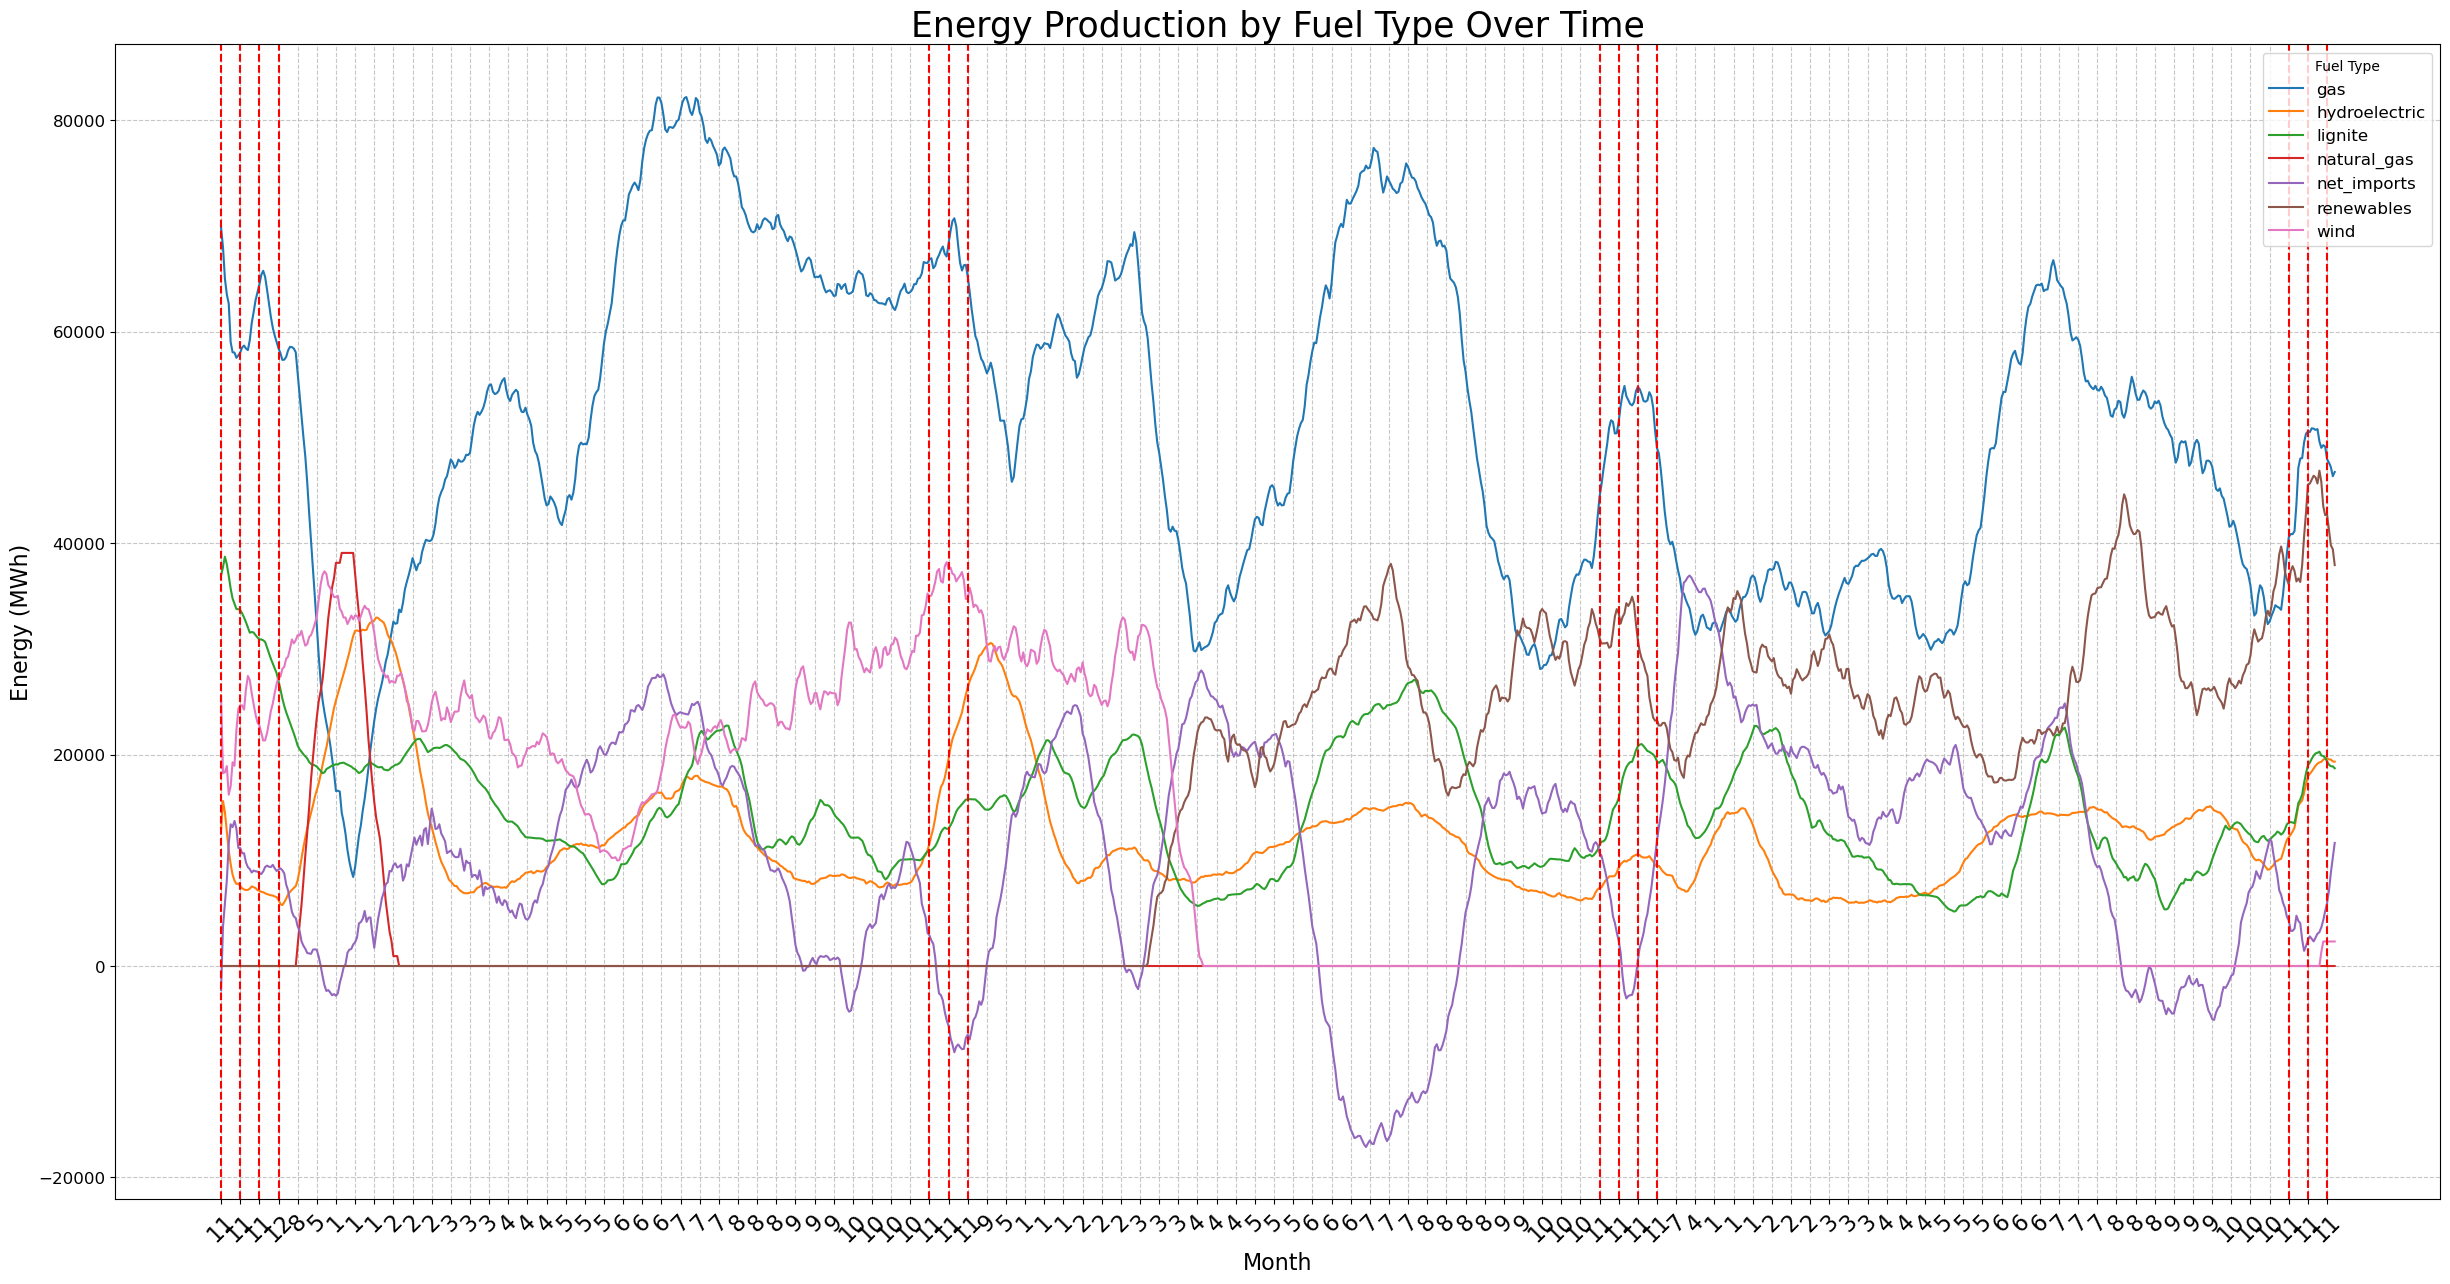

In [14]:
fuel_columns = ['gas', 'hydroelectric', 'lignite', 'natural_gas', 
                'net_imports', 'renewables', 'wind']

plt.figure(figsize=(30, 15))

# Plot each fuel type
for fuel in fuel_columns:
    plt.plot(
        range(len(rolling_table)), 
        rolling_table[fuel],    
        label=fuel          
    )

ticks = rolling_table.index[::10]  # Take every 10th index to avoind crouding the x-axis

labels = rolling_table['month'].iloc[::10]  # Corresponding labels

plt.xticks(
    ticks=ticks,  
    labels=labels,  
    rotation=45,  # Rotate labels for better readability
    fontsize=16
)

plt.yticks(fontsize=12)

# Draw vertical red lines for ticks with label '12'
for tick, label in zip(ticks, labels):
    if label == 12 or label == 11:
        plt.axvline(x=tick, color='red', linestyle='--', linewidth=1.5)

        
plt.title('Energy Production by Fuel Type Over Time', fontsize=25)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Energy (MWh)', fontsize=16)

plt.legend(title='Fuel Type', fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.savefig('energy_sources_progression.png', dpi=300)
plt.show()

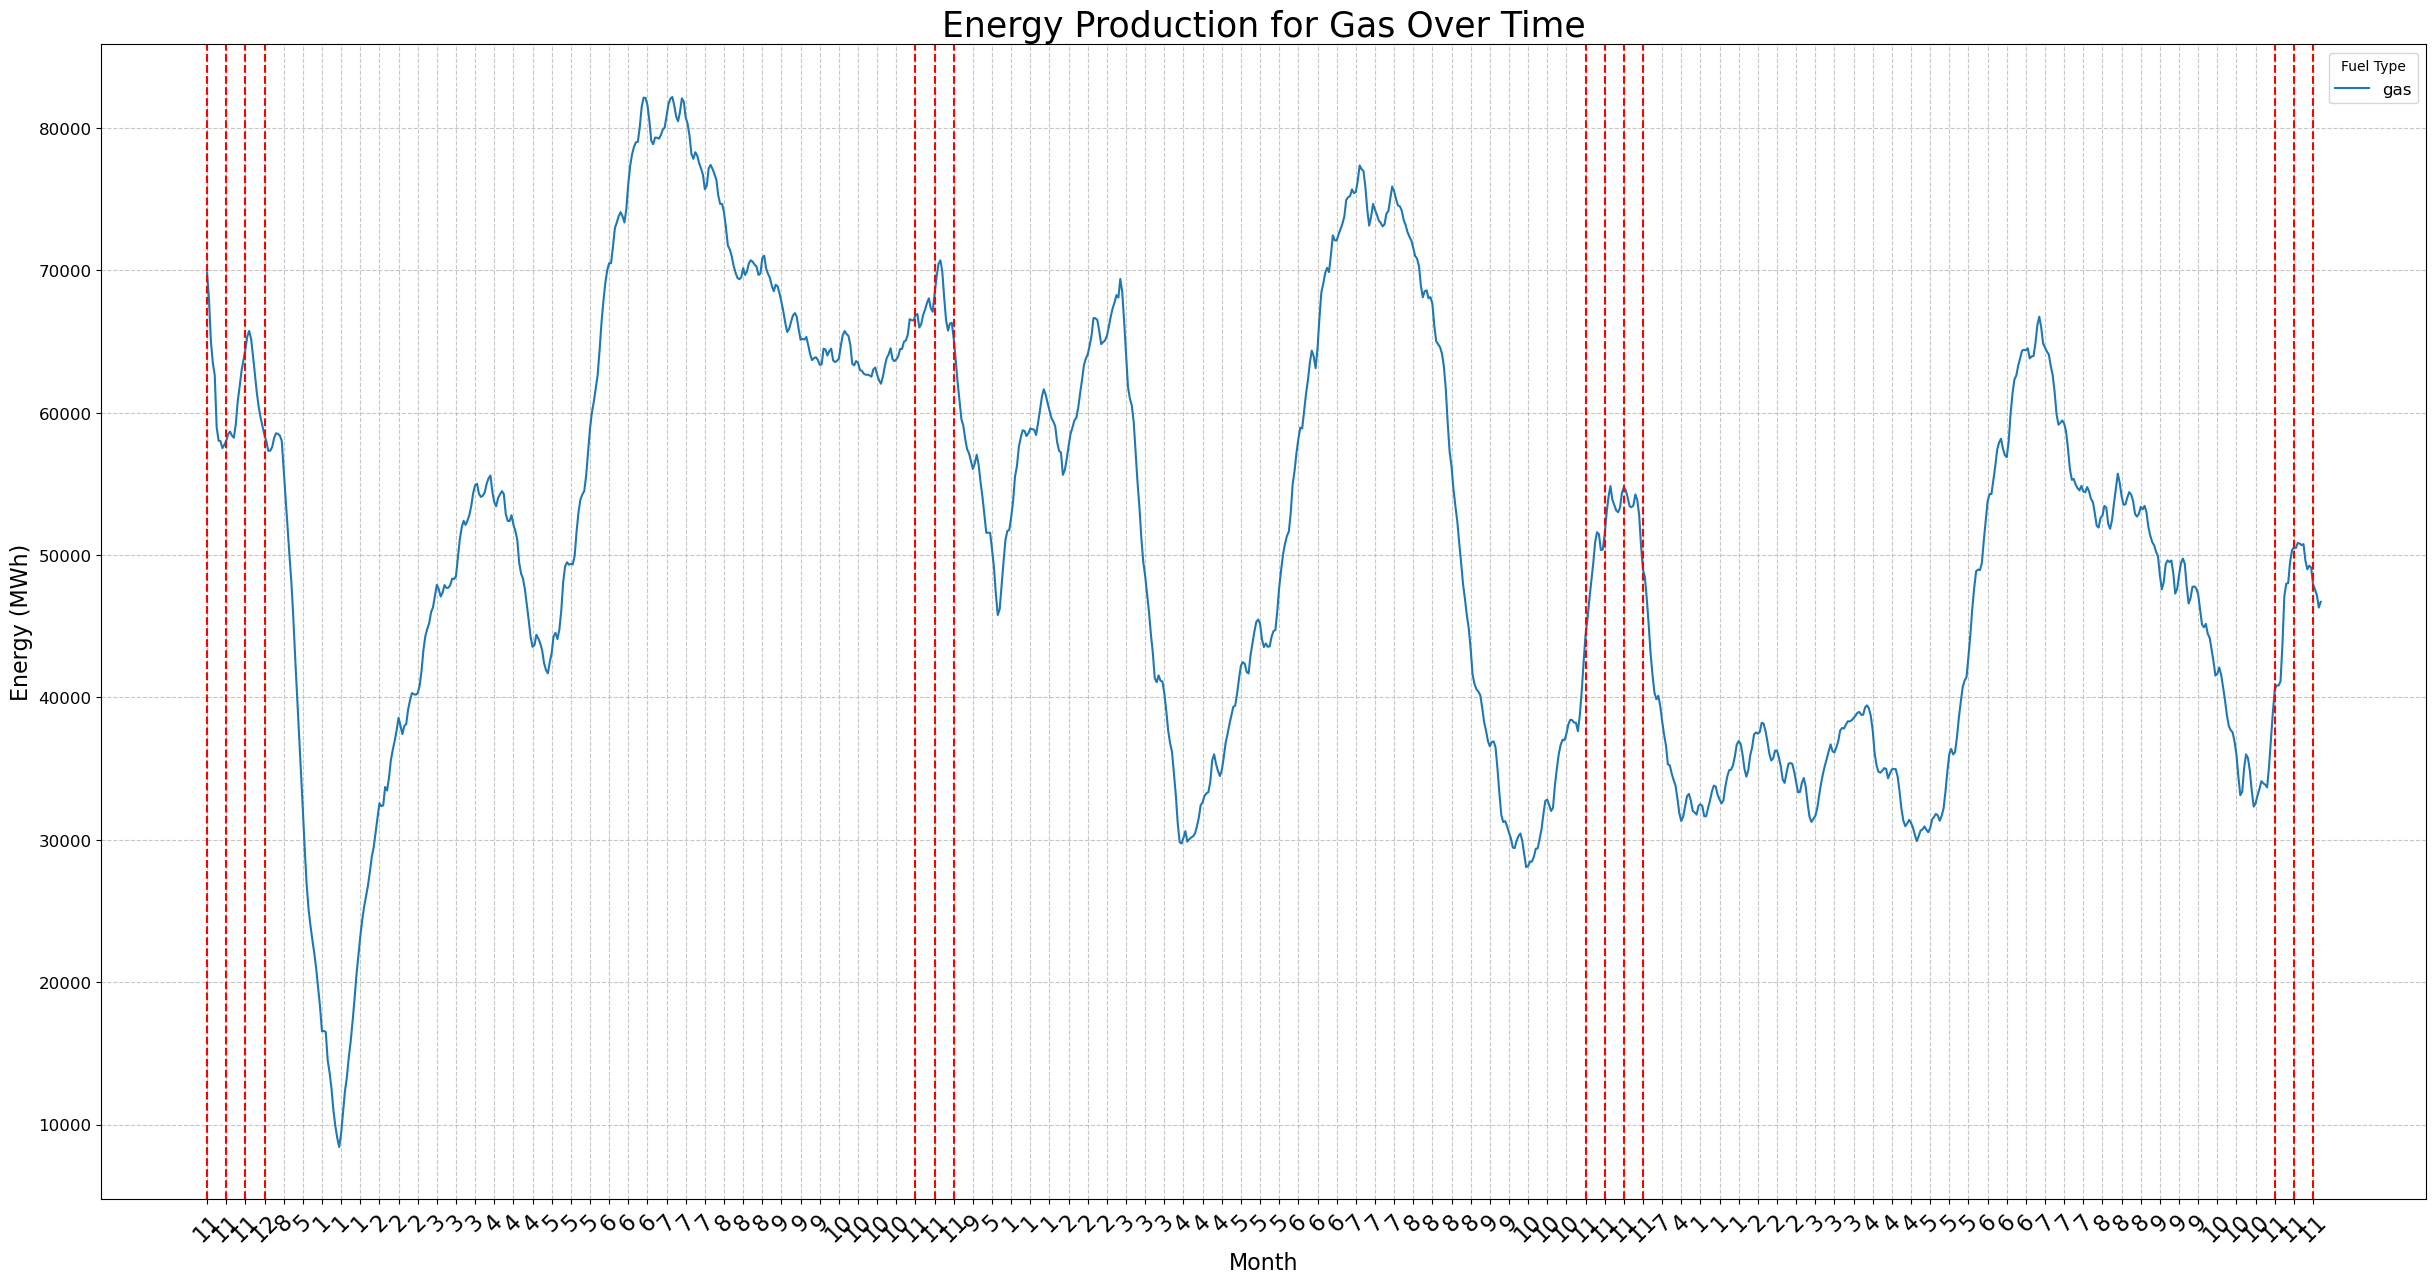

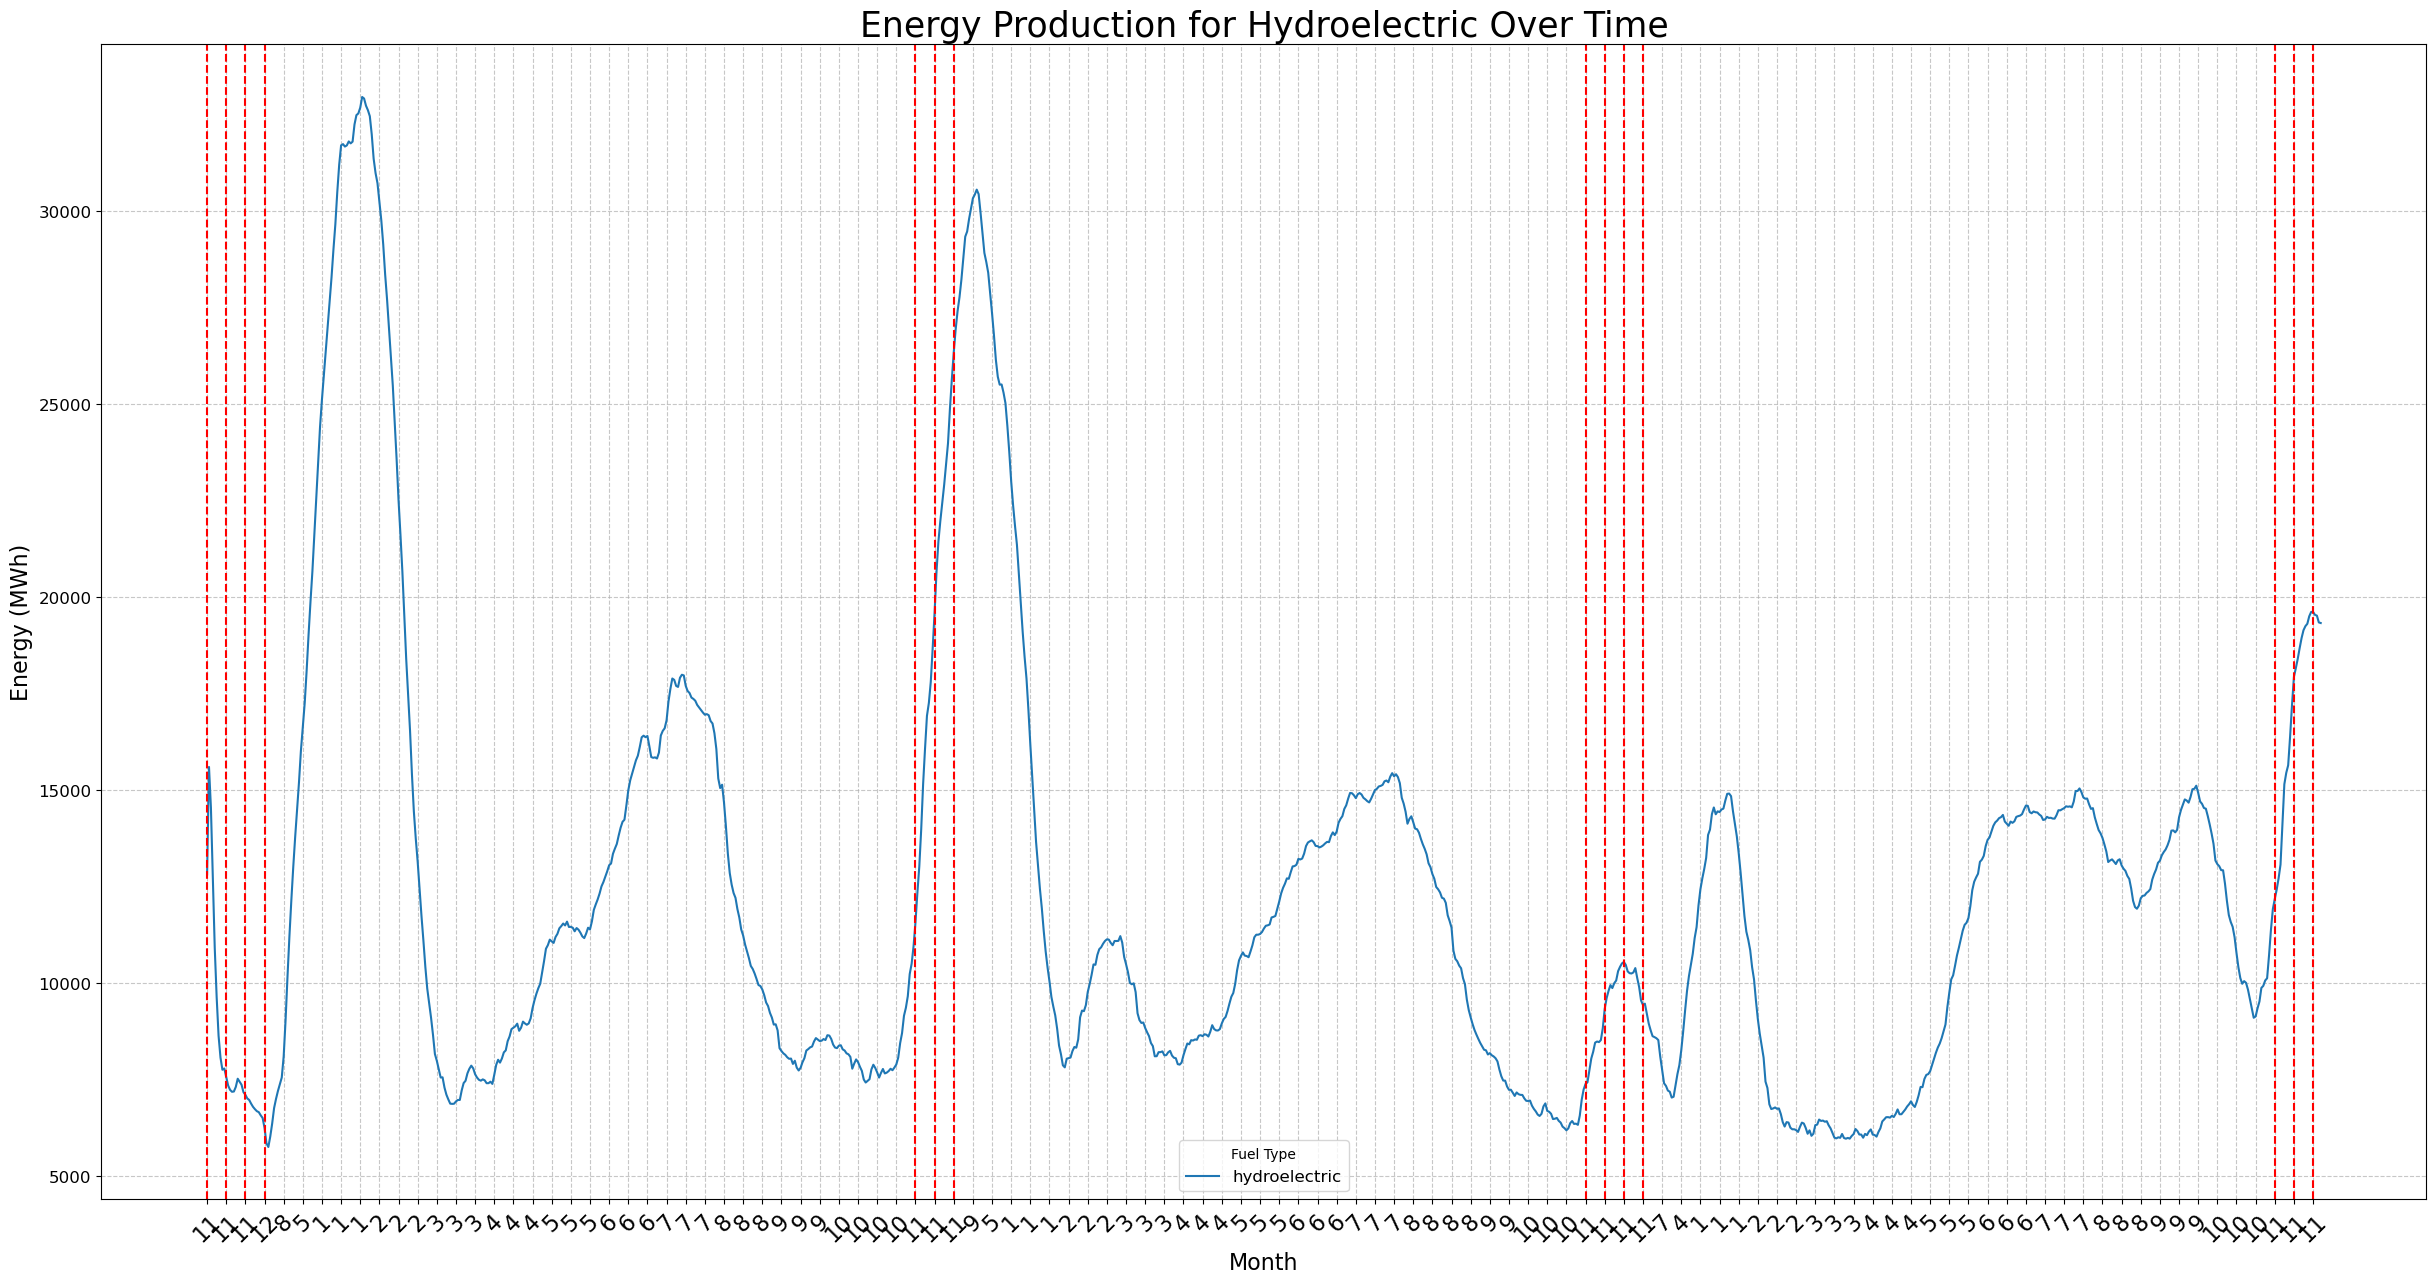

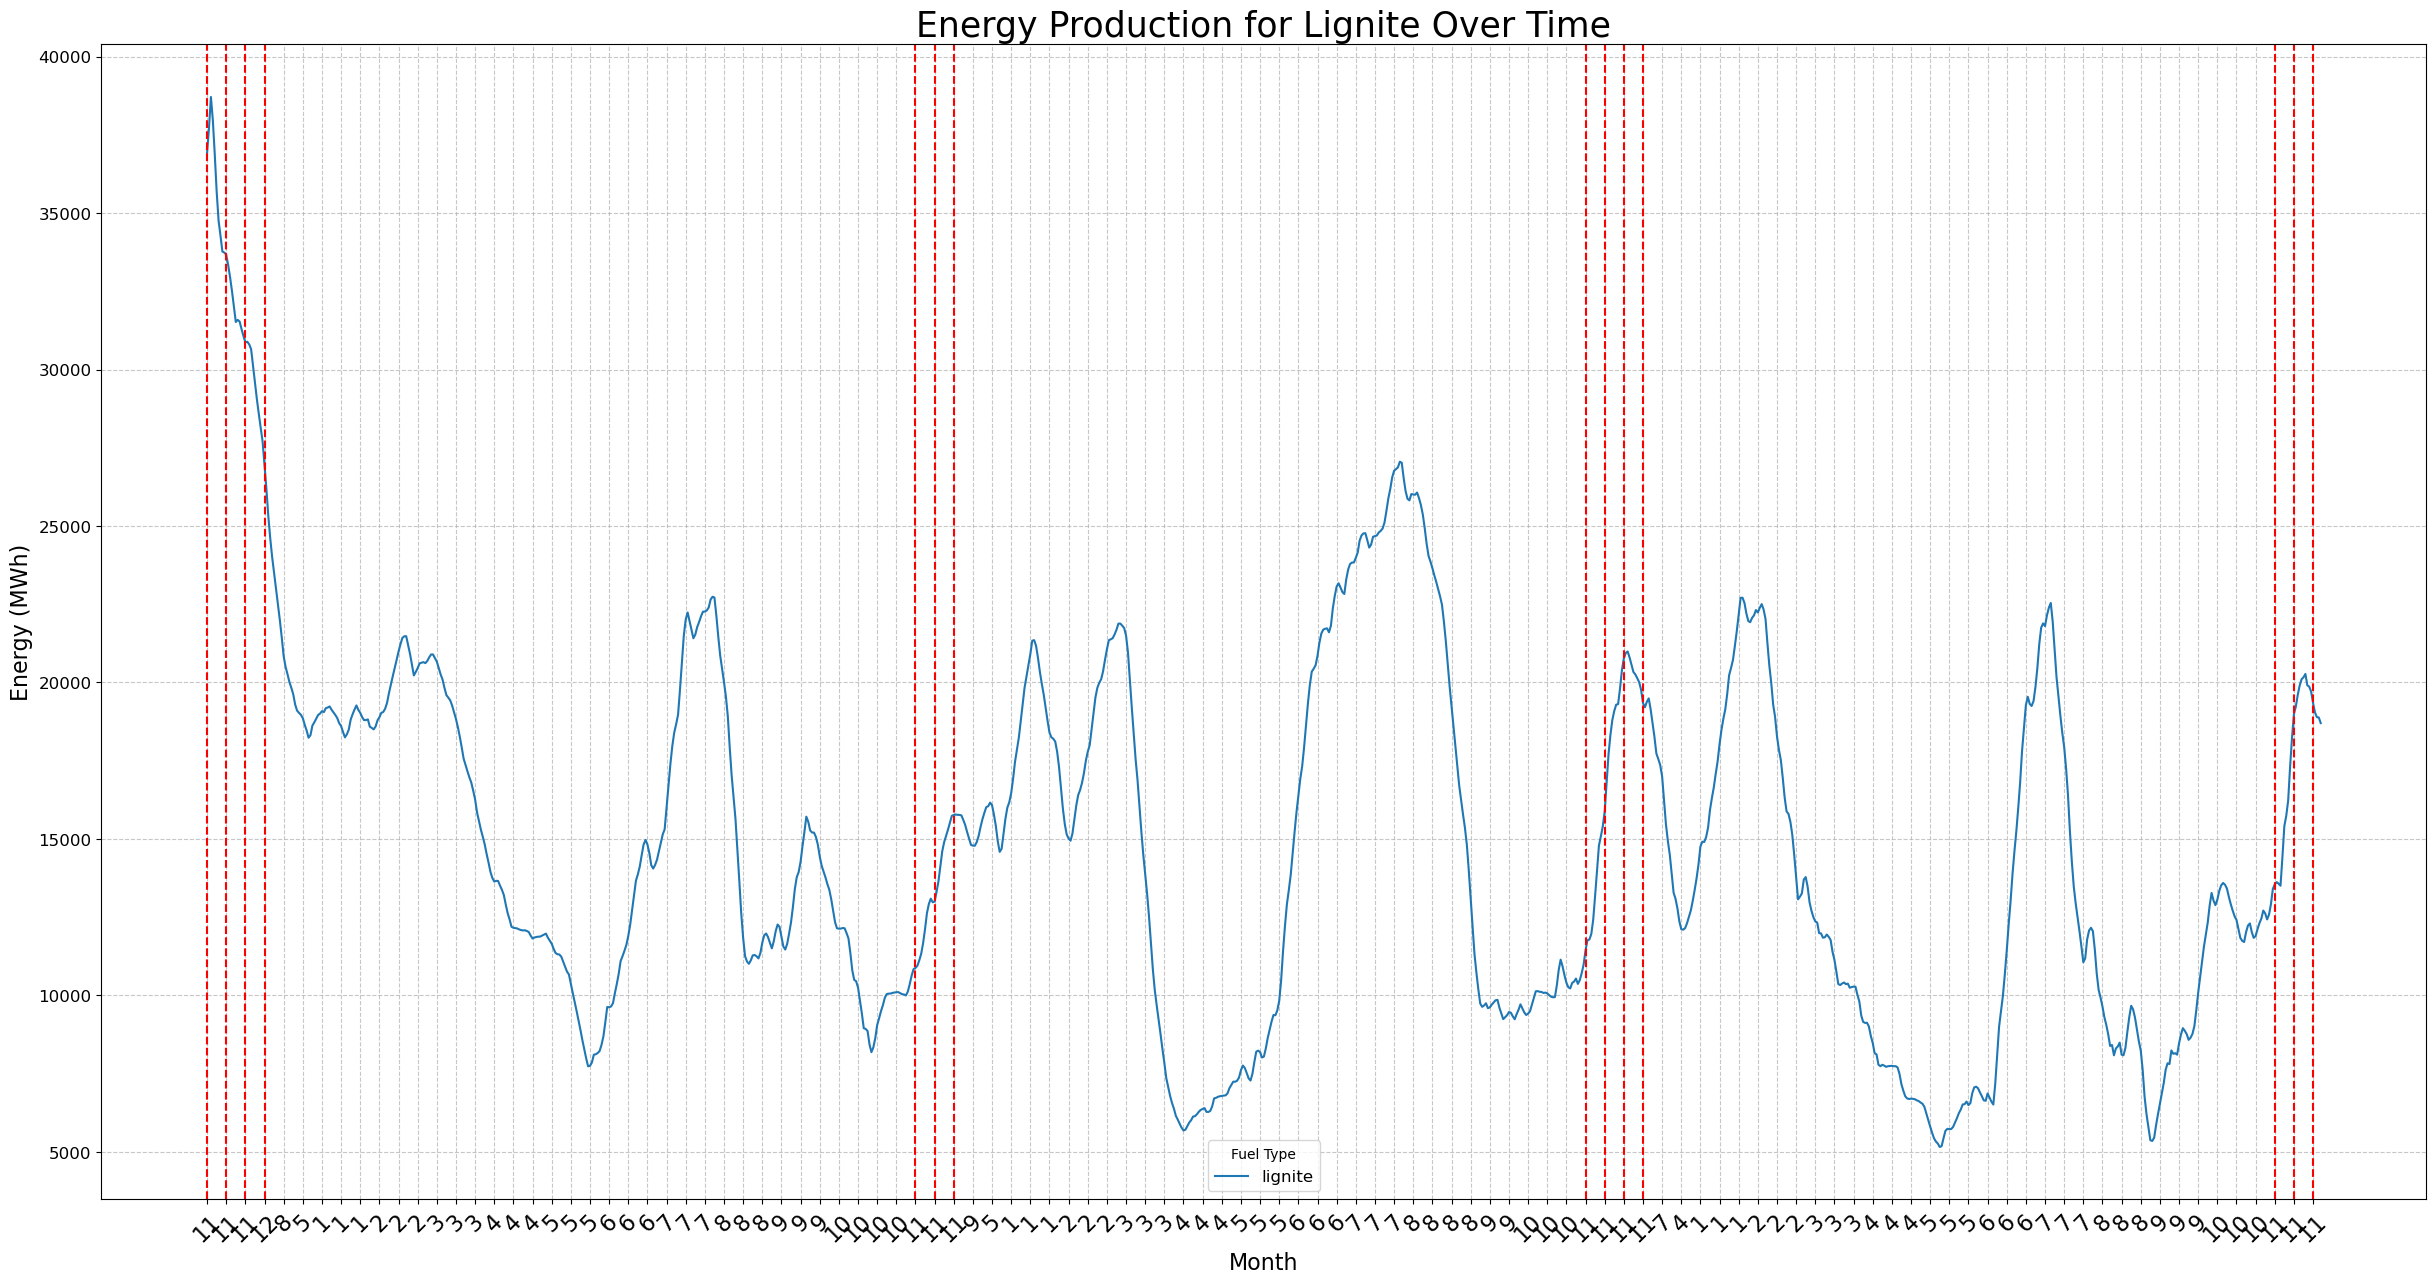

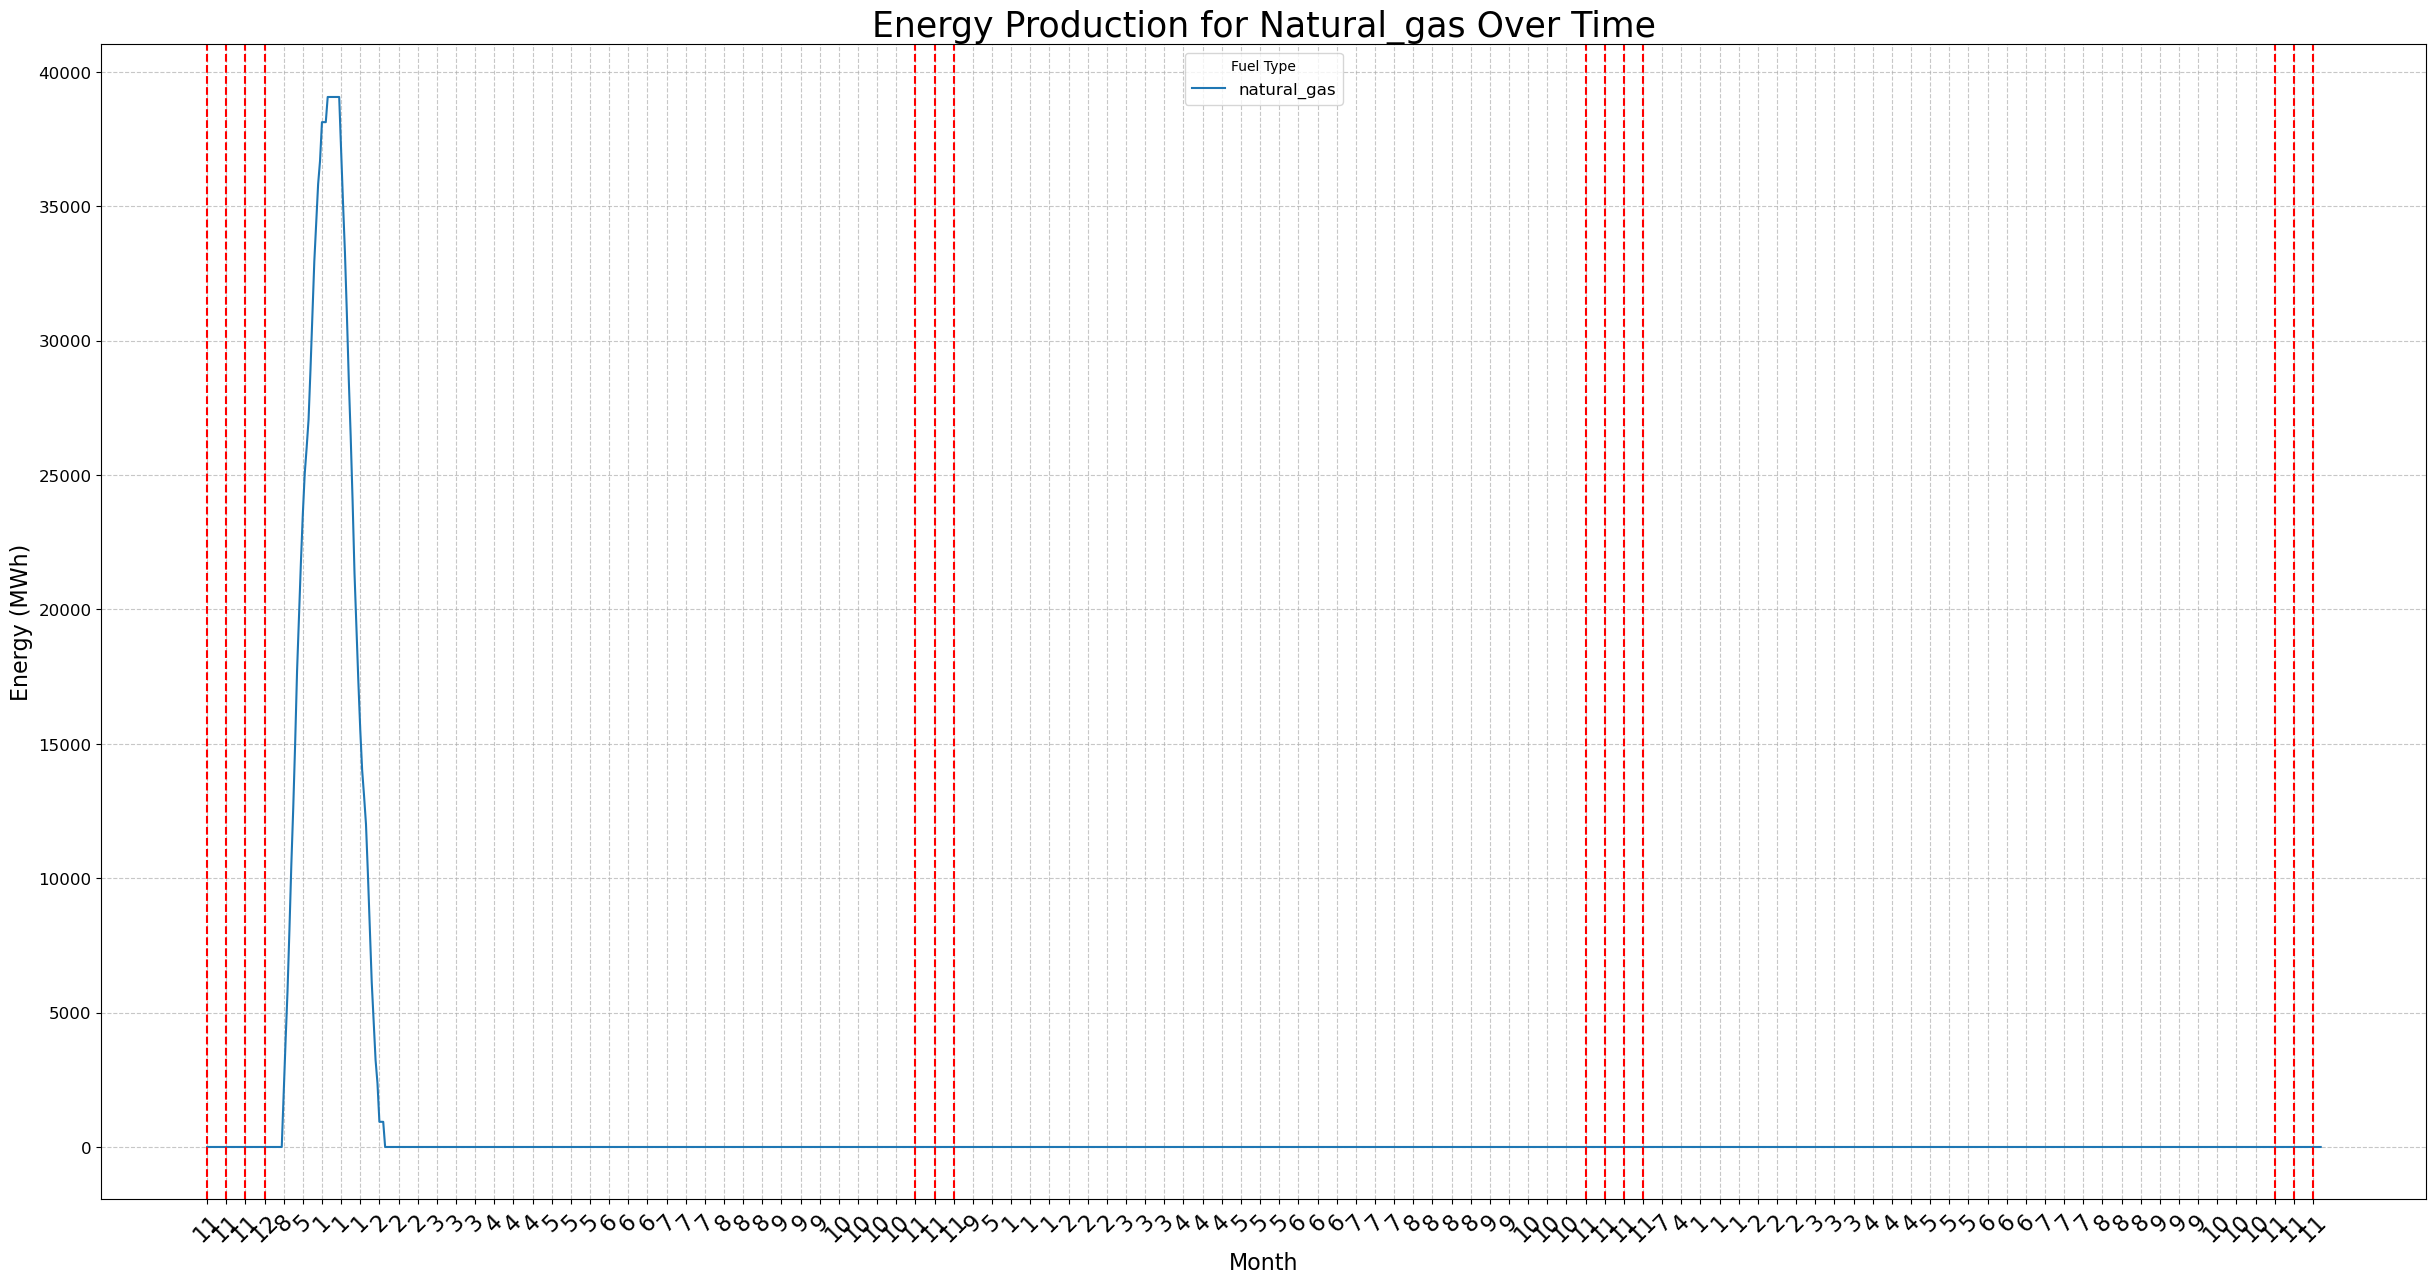

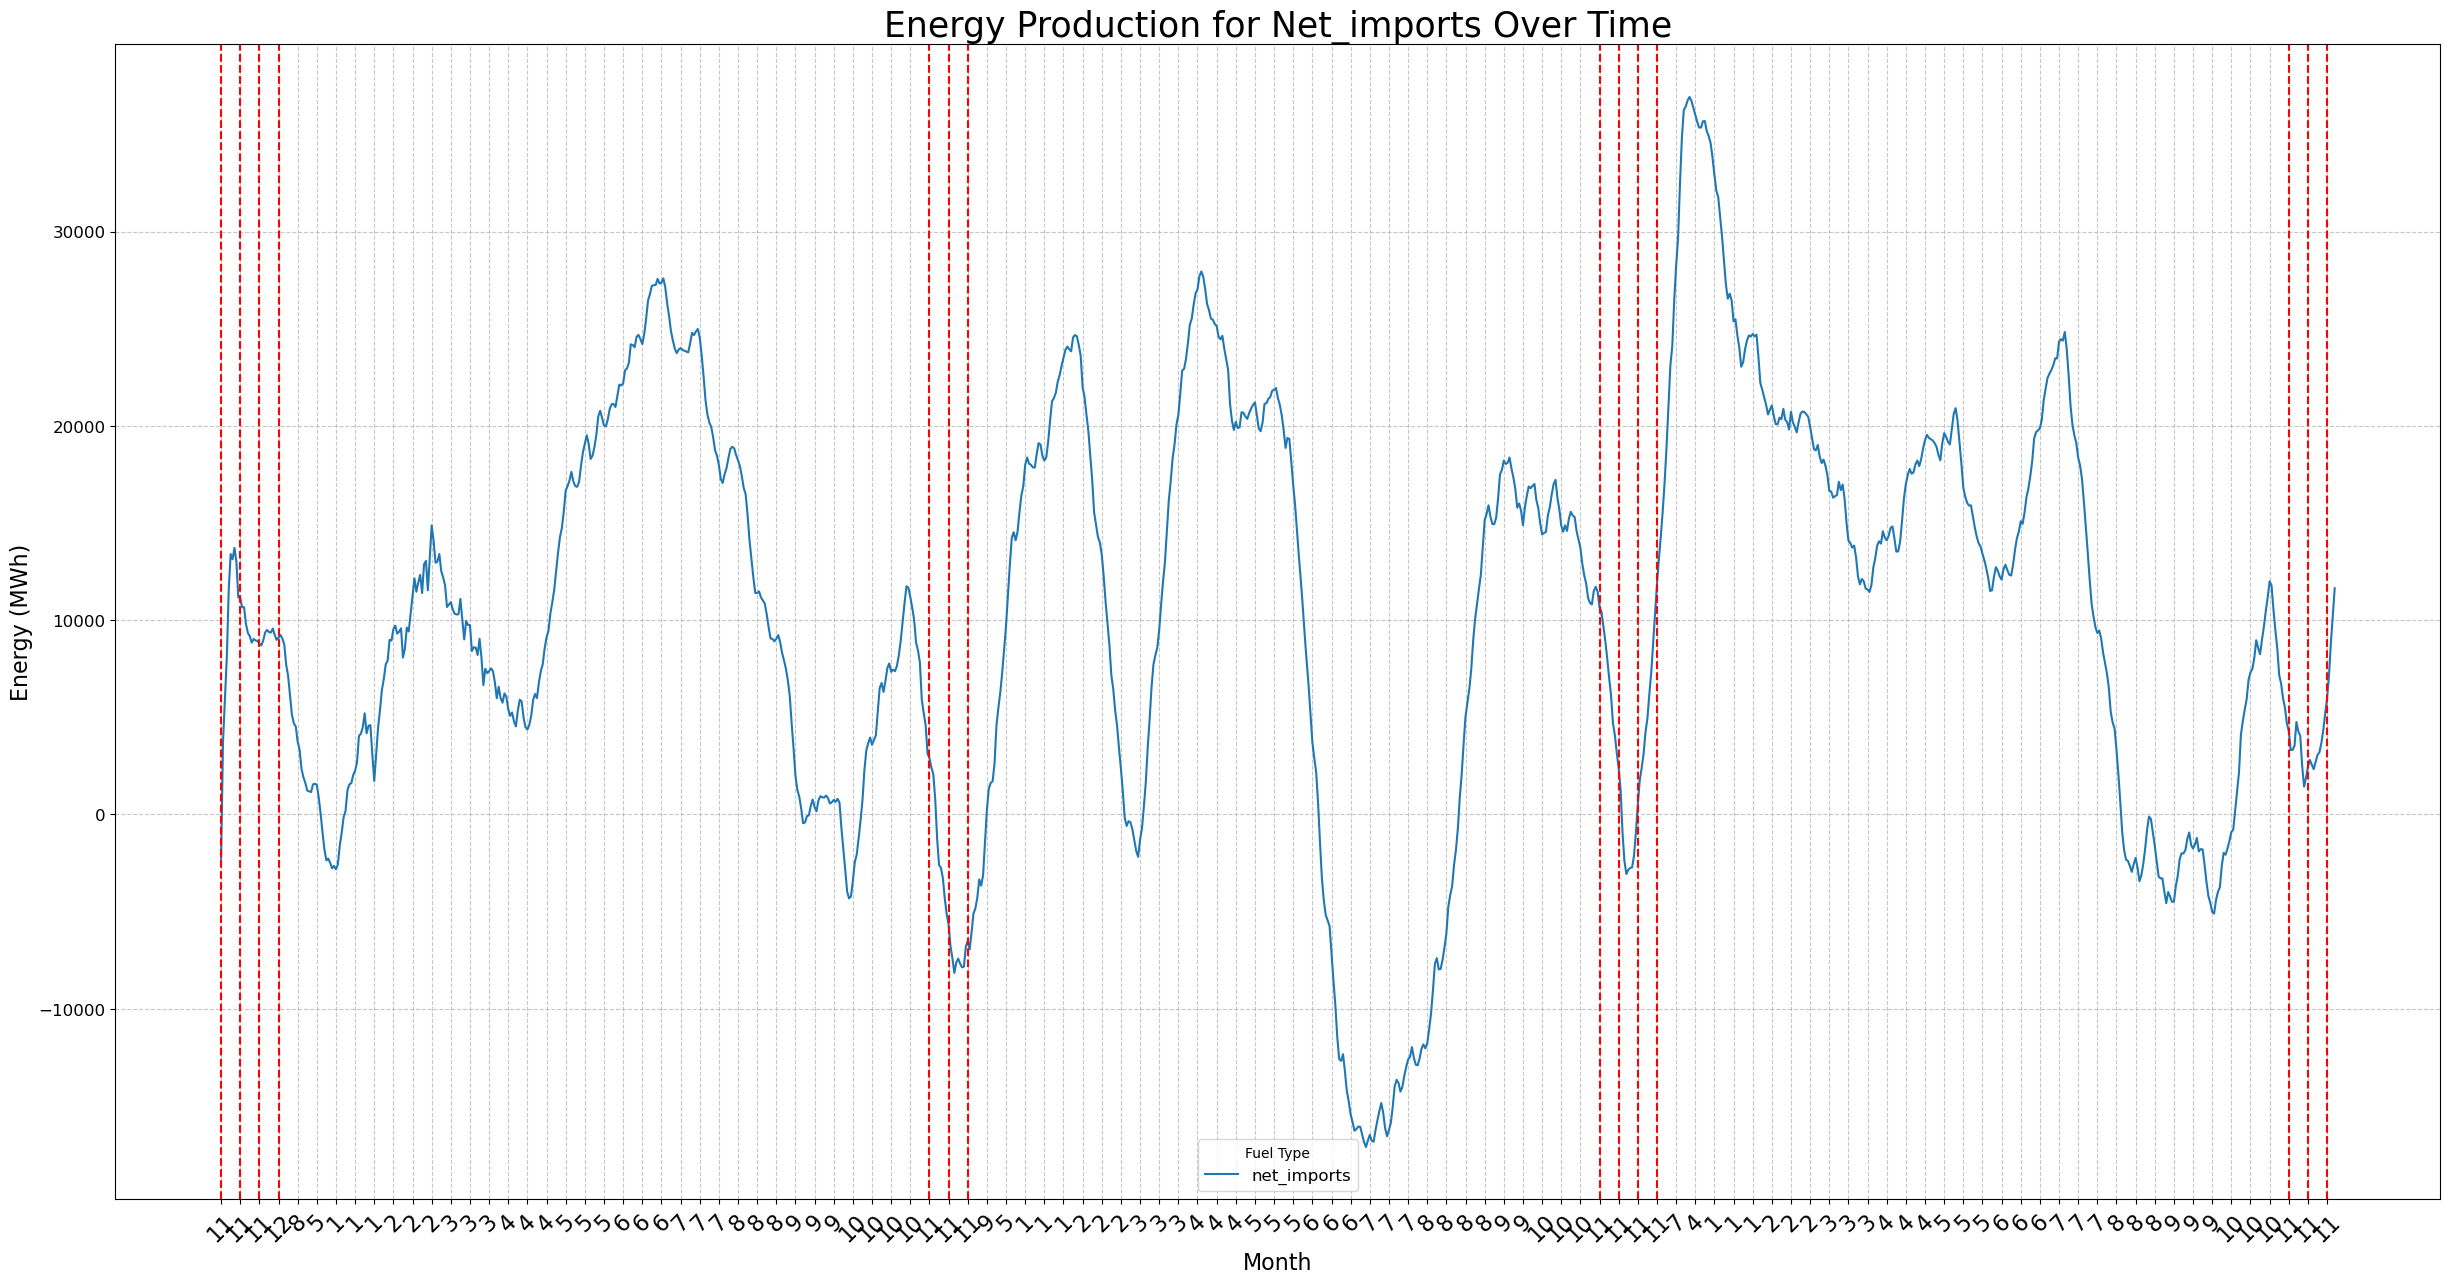

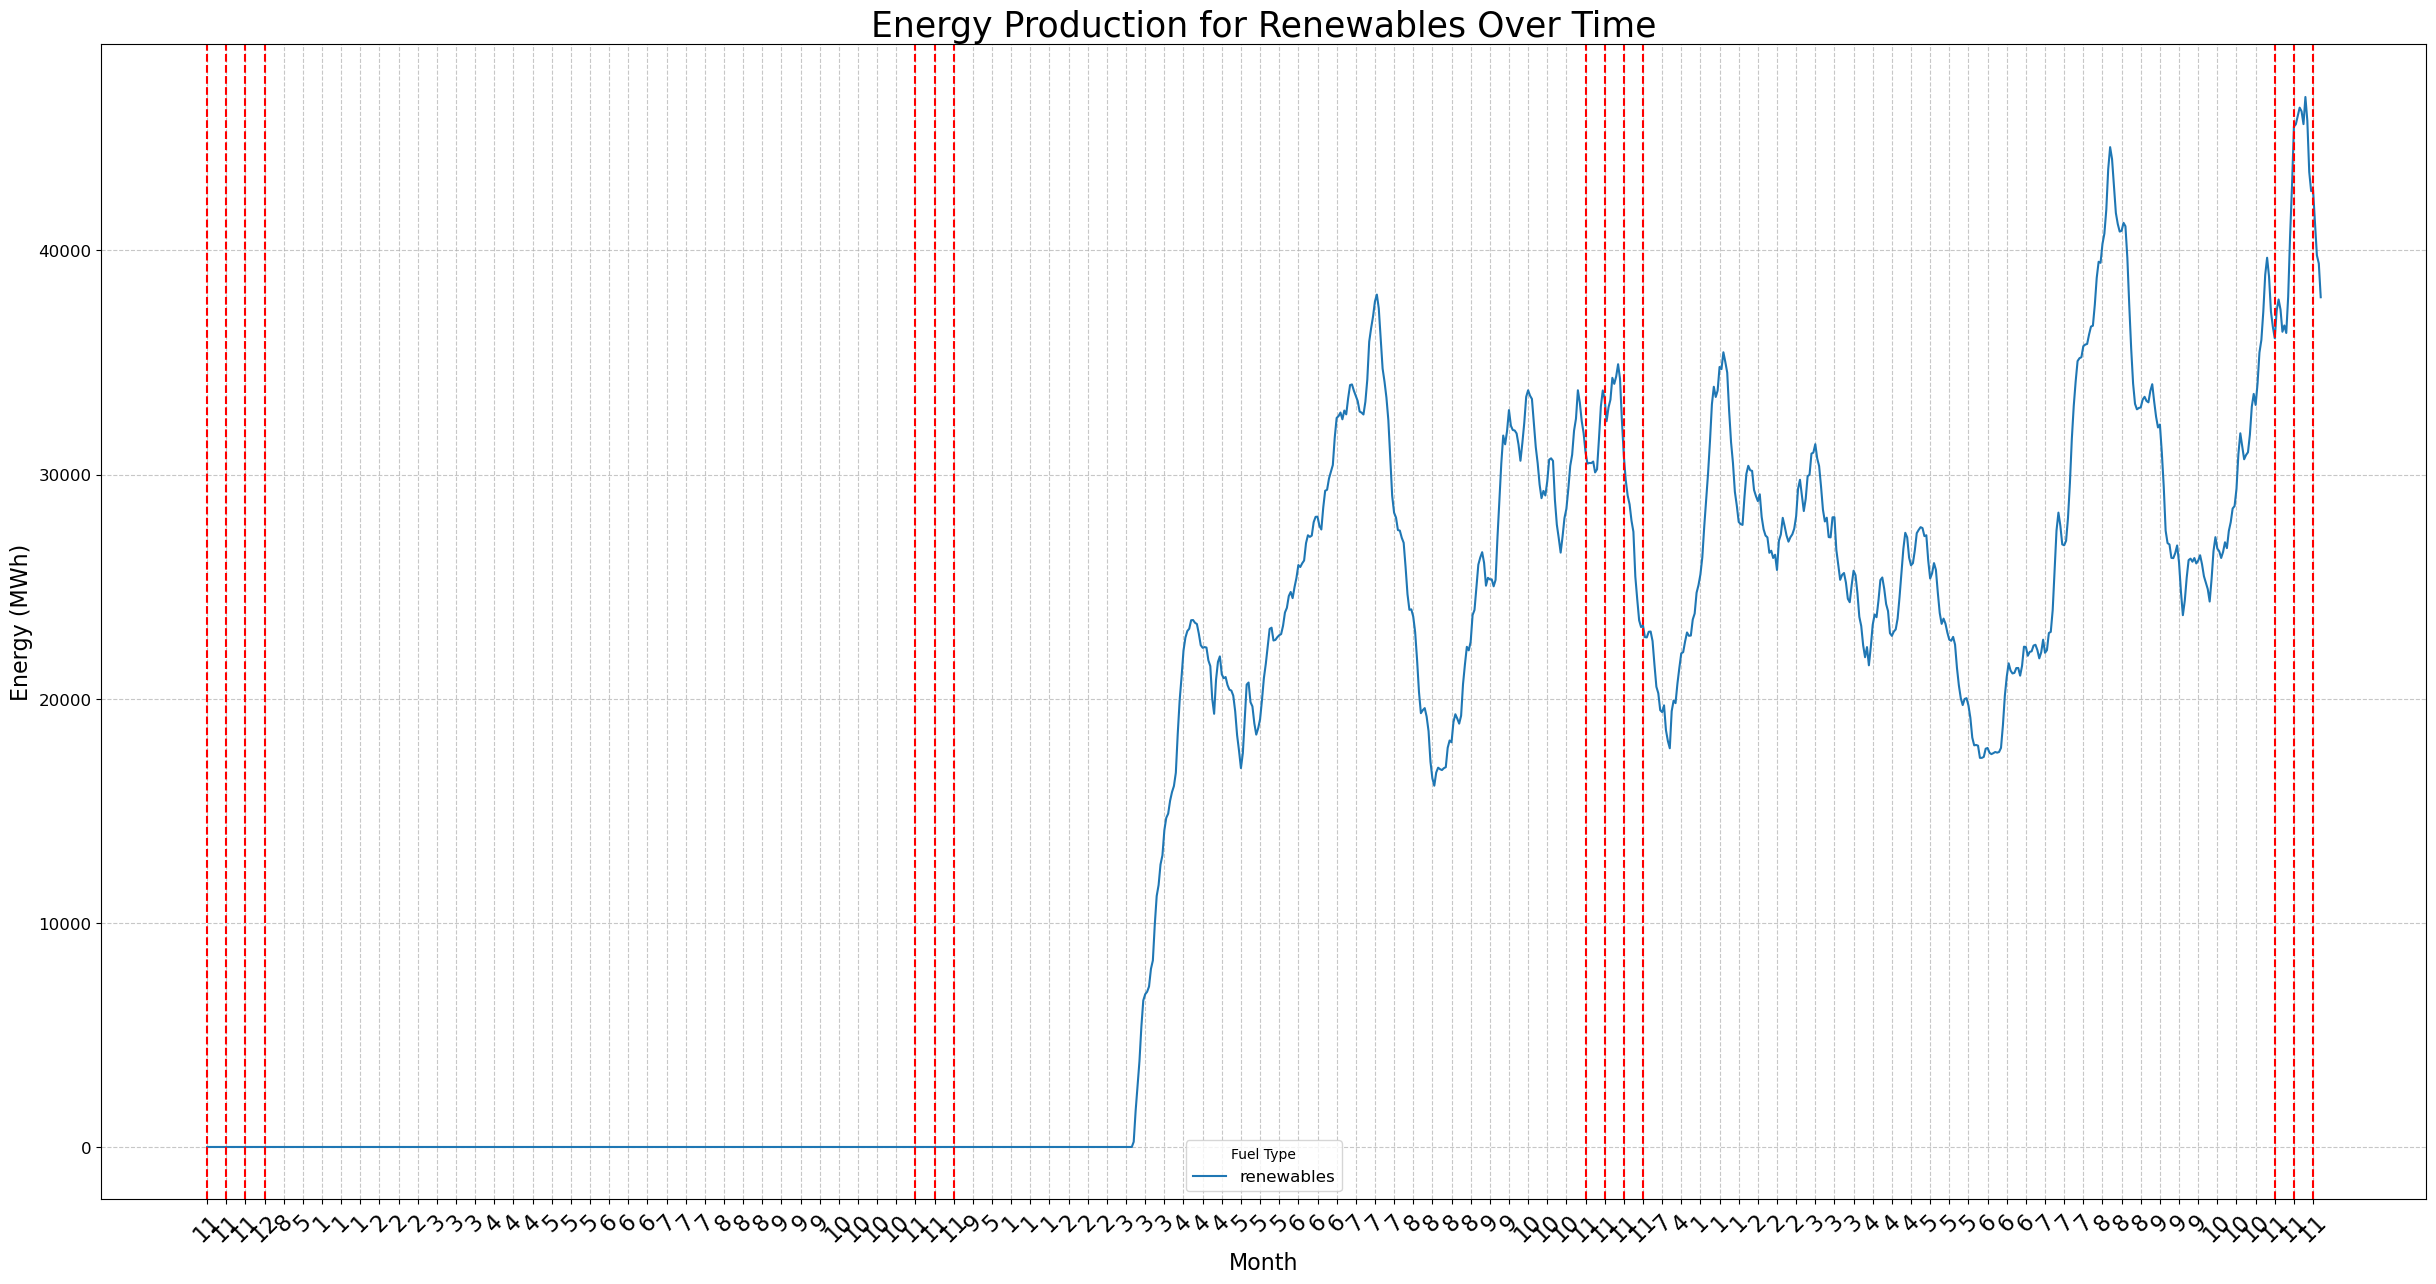

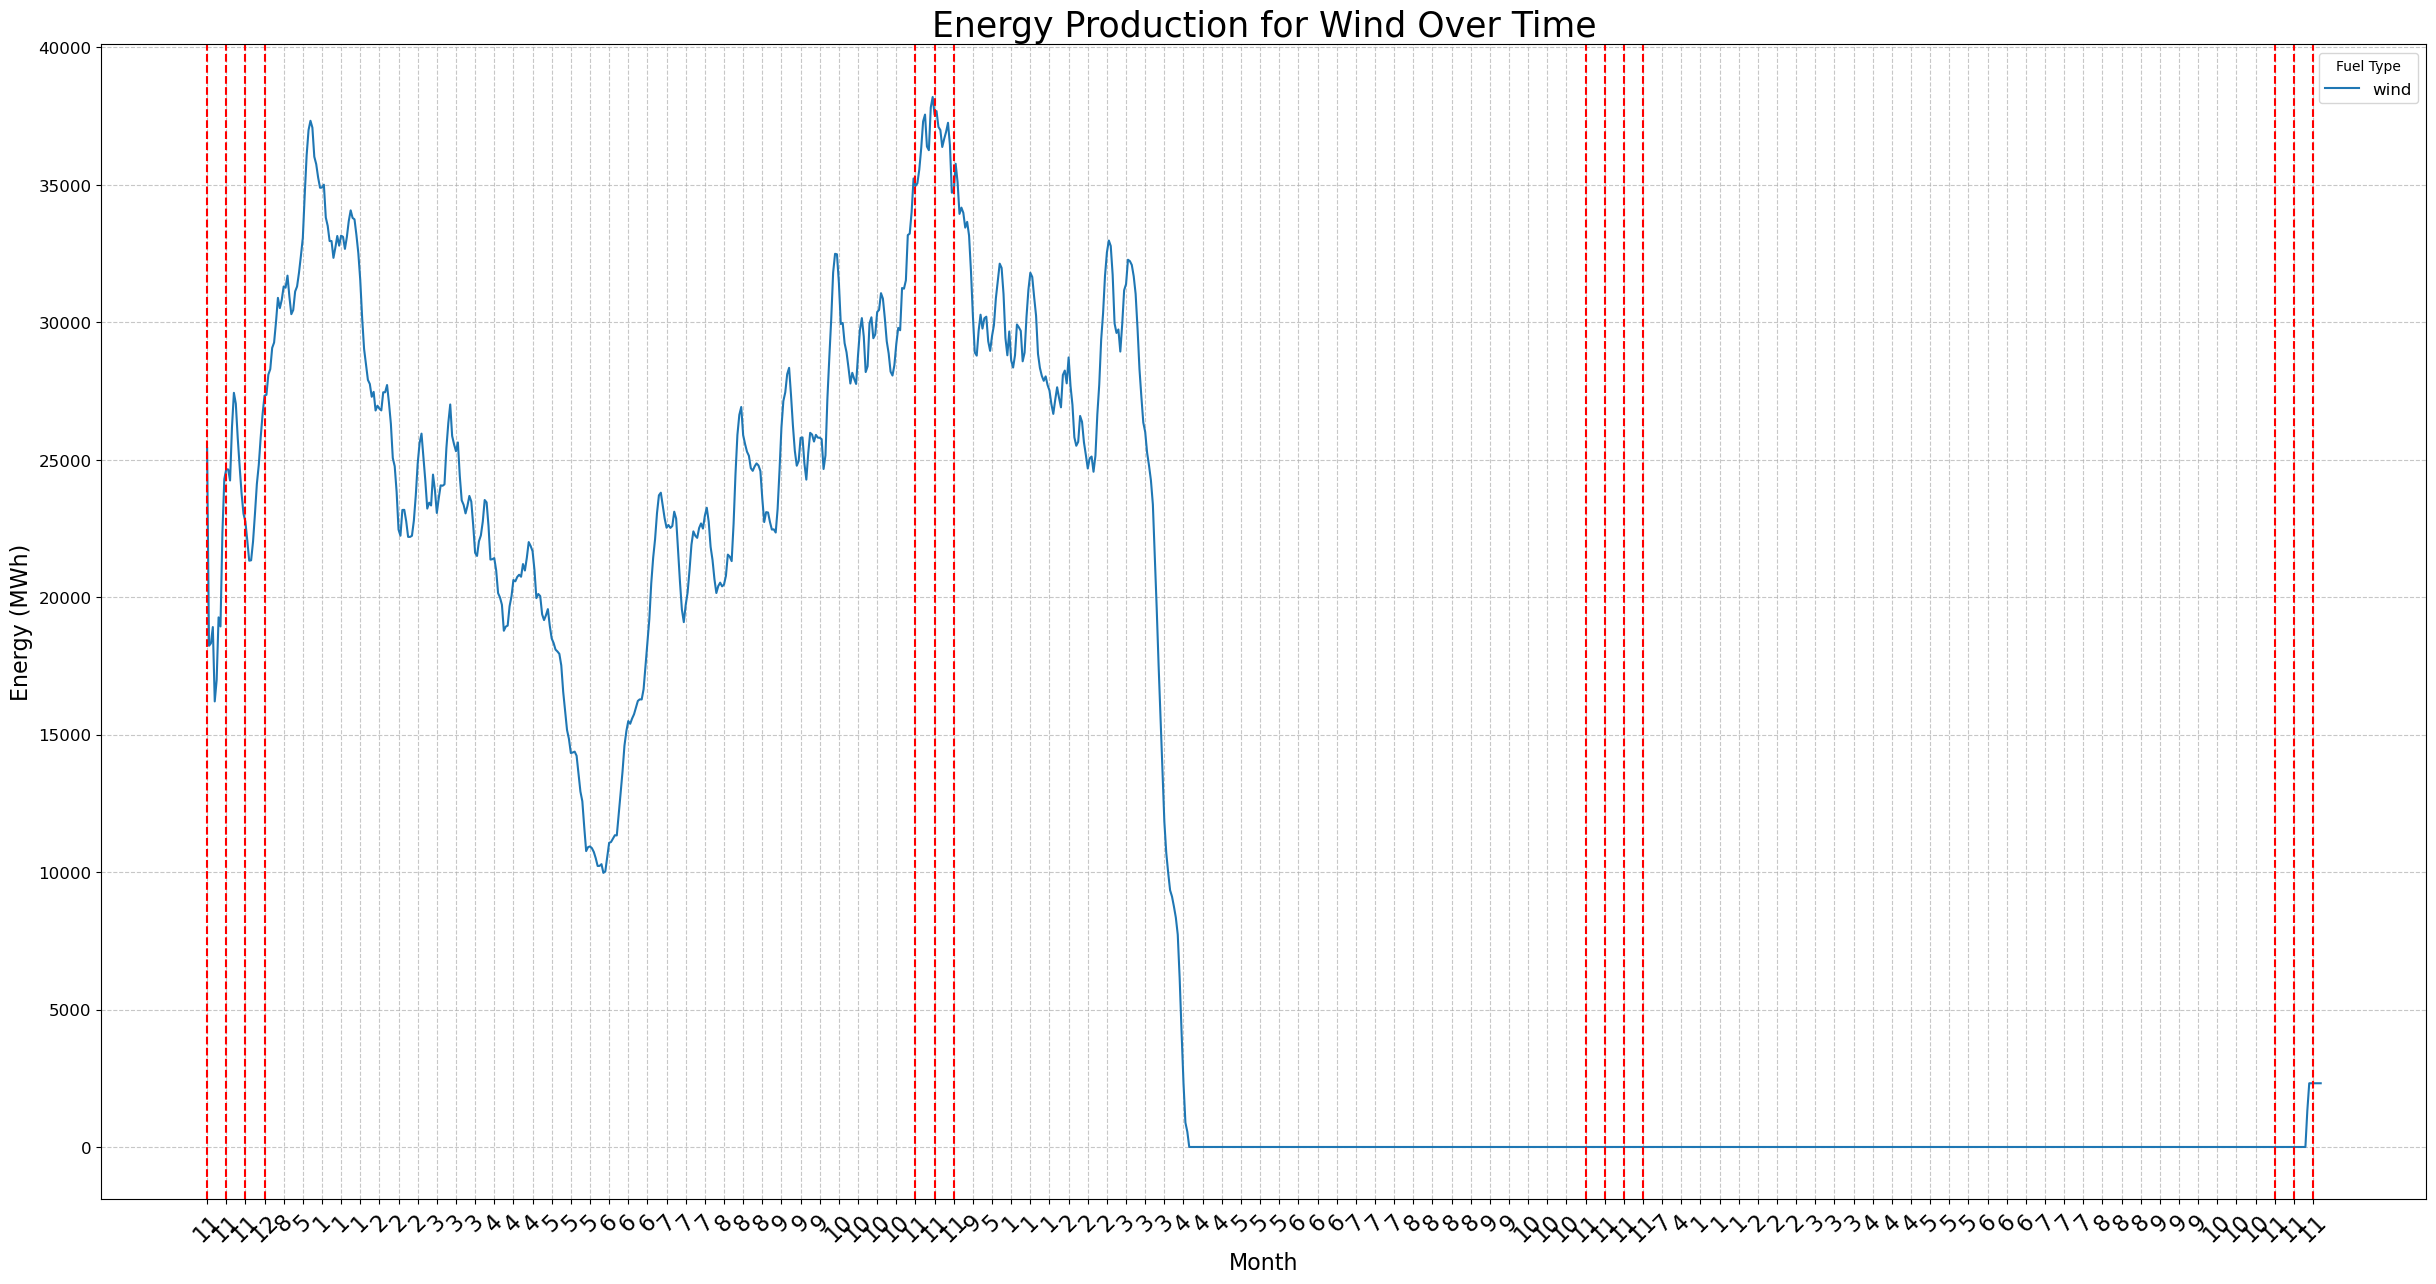

In [19]:
fuel_columns = ['gas', 'hydroelectric', 'lignite', 'natural_gas', 
                'net_imports', 'renewables', 'wind']

# Loop through each fuel type
for fuel in fuel_columns:
    # Set up the figure
    plt.figure(figsize=(30, 15))
    
    # Plot the current fuel type
    plt.plot(
        range(len(rolling_table)),  # Using row indices as x-axis
        rolling_table[fuel],       # Plot the values for the current fuel type
        label=fuel                 # Add label for the legend
    )
    
    # Define x-ticks
    ticks = rolling_table.index[::10]  # Take every 10th index
    labels = rolling_table['month'].iloc[::10]  # Corresponding labels

    plt.xticks(
        ticks=ticks,  # Positions for the ticks
        labels=labels,  # Labels for the ticks
        rotation=45,  # Rotate labels for better readability
        fontsize=16
    )

    plt.yticks(fontsize=12)

    # Draw vertical red lines for ticks with label '12'
    for tick, label in zip(ticks, labels):
        if label == 12 or label == 11:
            plt.axvline(x=tick, color='red', linestyle='--', linewidth=1.5)
    
    # Adding titles and labels
    plt.title(f'Energy Production for {fuel.capitalize()} Over Time', fontsize=25)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Energy (MWh)', fontsize=16)

    # Adding a legend to differentiate the current fuel type
    plt.legend(title='Fuel Type', fontsize=12)

    # Display the plot
    plt.grid(visible=True, linestyle='--', alpha=0.7)

    plt.savefig(f'{fuel}_energy_production_progression.png')
    plt.show()


In [20]:
energy_trade = energy[energy['fuel'] == 'Net Imports (Imports - Exports)'].reset_index(drop=True)
energy_total = energy[energy['fuel'] == 'Total'].reset_index(drop=True).rename(columns={'energy_mwh': 'total_energy_mwh'})
energy_total

date  total_energy_mwh   fuel  percentage  year  month  \
0     2020-11-30 19:00:00            142704  Total       1.004  2020     11   
1     2020-12-01 19:00:00            143824  Total       1.000  2020     12   
2     2020-12-02 19:00:00            141005  Total       1.000  2020     12   
3     2020-12-03 19:00:00            137215  Total       1.000  2020     12   
4     2020-12-04 19:00:00            126359  Total       1.000  2020     12   
...                   ...               ...    ...         ...   ...    ...   
1105  2023-12-26 00:00:00             93077  Total       1.000  2023     12   
1106  2023-12-27 00:00:00            103279  Total       1.000  2023     12   
1107  2023-12-28 00:00:00            106065  Total       1.000  2023     12   
1108  2023-12-29 00:00:00            108428  Total       1.000  2023     12   
1109  2023-12-30 00:00:00            113326  Total       1.000  2023     12   

      day  absolute_energy_mwh  
0      30           143274.816  
1       1           143824.000  
2       2           141005.000  
3       3           137215.000  
4       4           126359.000  
...   ...                  ...  
1105   26            93077.000  
1106   27           103279.000  
1107   28           106065.000  
1108   29           108428.000  
1109   30           113326.000  

[1110 rows x 8 columns]

In [21]:
energy_trade = pd.concat([energy_trade, energy_total['total_energy_mwh']], axis=1).drop(columns=['fuel', 'date'])
energy_trade

energy_mwh  percentage  year  month  day  absolute_energy_mwh  \
0          -2280   -0.010000  2020     11   30            22.800000   
1           9736    0.067694  2020     12    1           659.067304   
2          10327    0.073239  2020     12    2           756.334378   
3          14607    0.110000  2020     12    3          1606.770000   
4          25489    0.201719  2020     12    4          5141.613348   
...          ...         ...   ...    ...  ...                  ...   
1105       23745    0.255111  2023     12   26          6057.619229   
1106       27957    0.270694  2023     12   27          7567.790635   
1107       31606    0.297987  2023     12   28          9418.179758   
1108       25885    0.238730  2023     12   29          6179.522125   
1109       31574    0.278612  2023     12   30          8796.899882   

      total_energy_mwh  
0               142704  
1               143824  
2               141005  
3               137215  
4               126359  
...                ...  
1105             93077  
1106            103279  
1107            106065  
1108            108428  
1109            113326  

[1110 rows x 7 columns]

In [22]:
mean_energy_trade = energy_trade.groupby(['year', 'month', 'day'])[['energy_mwh','total_energy_mwh']].mean().reset_index()
mean_energy_trade.rename(columns={'energy_mwh': 'mean_energy_mwh', 'total_energy_mwh': 'mean_total_energy_mwh'}, inplace=True)

rolling_energy_trade = mean_energy_trade.rolling(window=30, step=1, min_periods=1).mean().sort_values(['year', 'month', 'day'], ascending=True)

rolling_energy_trade[['year', 'month', 'day']] = rolling_energy_trade[['year', 'month', 'day']].astype(dtype='int', copy=False)
rolling_energy_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1105 non-null   int64  
 1   month                  1105 non-null   int64  
 2   day                    1105 non-null   int64  
 3   mean_energy_mwh        1105 non-null   float64
 4   mean_total_energy_mwh  1105 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 43.3 KB


In [23]:
sc = MinMaxScaler()

scaled_energies = sc.fit_transform(rolling_energy_trade[['mean_energy_mwh', 'mean_total_energy_mwh']])
scaled_energies = pd.DataFrame(scaled_energies, columns=['mean_energy_mwh', 'mean_total_energy_mwh'])

In [24]:
scaled_rolling_table = pd.concat(
    [rolling_table.loc[:, ['year', 'month', 'day']],
     scaled_energies
    ], axis=1
).reset_index(drop=True)

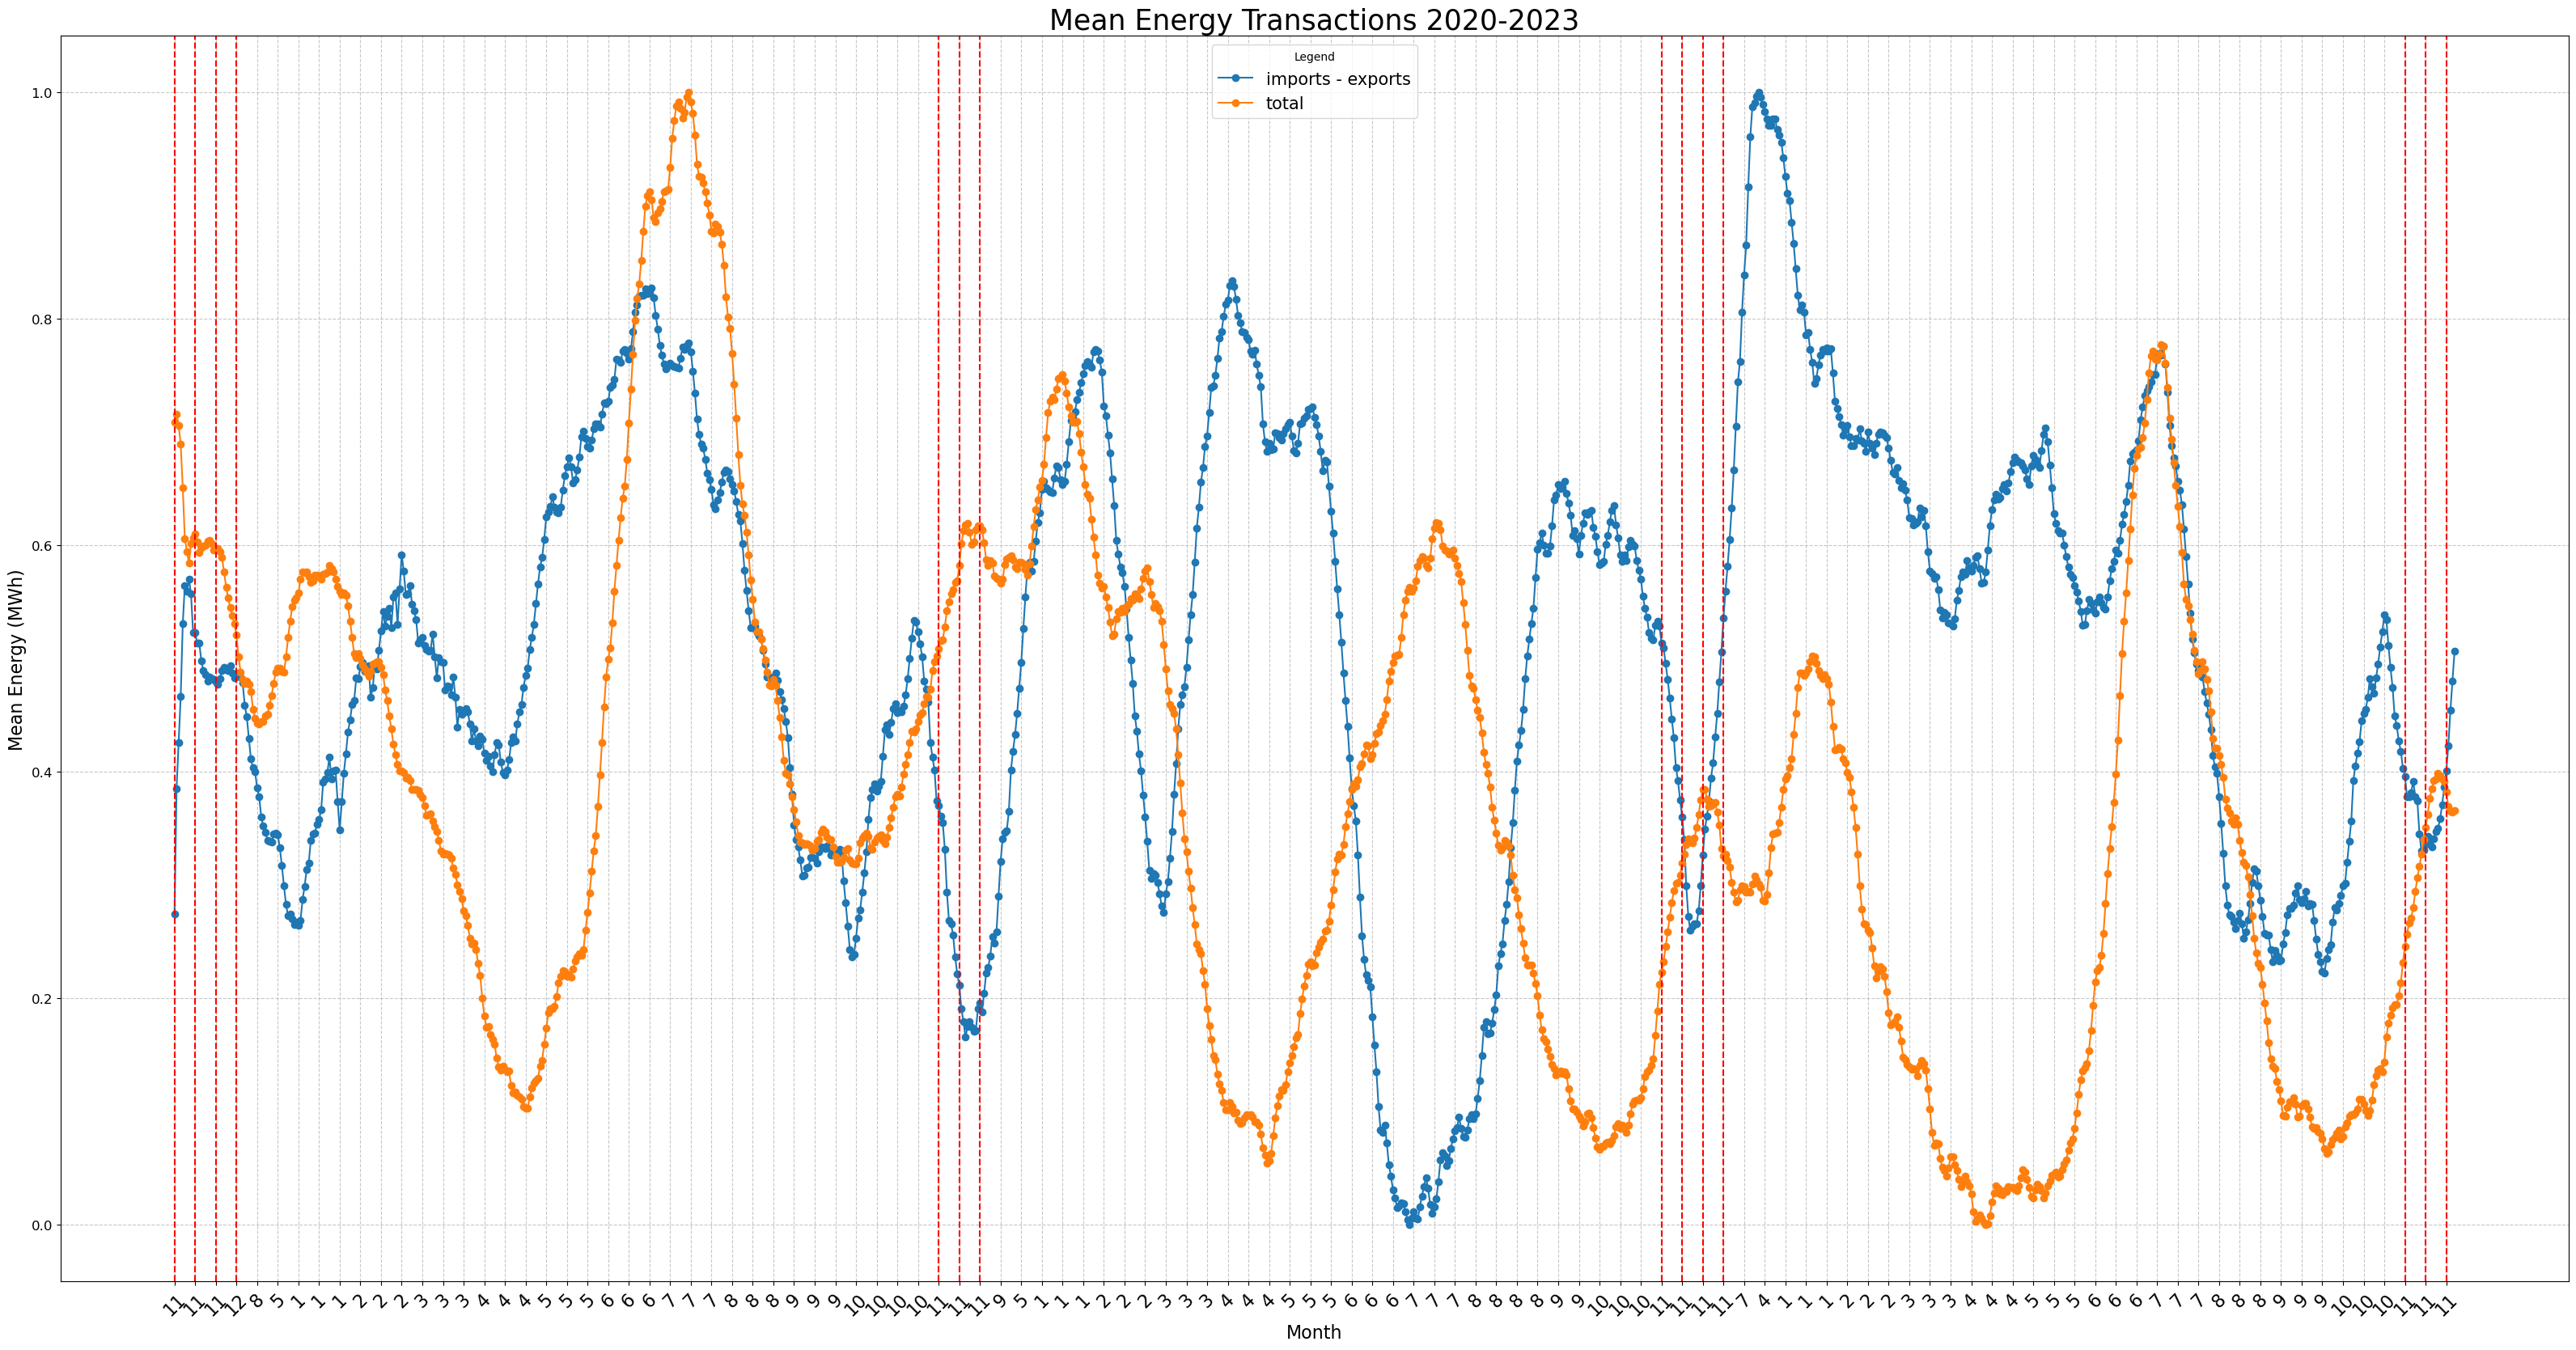

In [25]:
plt.figure(figsize=(40, 20))  
plt.plot(scaled_rolling_table.index, scaled_rolling_table['mean_energy_mwh'], marker='o')
plt.plot(scaled_rolling_table.index, scaled_rolling_table['mean_total_energy_mwh'], marker='o')

# Adding titles and labels
plt.title('Mean Energy Transactions 2020-2023', fontsize=25)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Energy (MWh)', fontsize=16)

# Set x-ticks to show every 5th day
ticks = scaled_rolling_table.index[::10]  # Take every 10th index to avoind crouding the x-axis

labels = scaled_rolling_table['month'].iloc[::10]  # Corresponding labels

plt.xticks(
    ticks=ticks,  # Positions for the ticks
    labels=labels,  # Labels for the ticks
    rotation=45,  # Rotate labels for better readability
    fontsize=16
)

plt.yticks(fontsize=12)

# Draw vertical red lines for ticks with label '12'
for tick, label in zip(ticks, labels):
    if label == 12 or label == 11:
        plt.axvline(x=tick, color='red', linestyle='--', linewidth=1.5)

# Display grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Legend', labels=['imports - exports', 'total'], fontsize=15)

plt.savefig('mean_energy_net_total.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
# Show the plot

plt.show()


In the scaled graph above we notice that during certain seasons (June-July & March-May) energy trade and total energy follow similar trends (downwards and upwardds respectively). A ratio plot will give a clearer view on wether energy is traded consistently when the energy needed is increased or decreased.

To avoid large numeric errors, we will calculate the ratio in non-scaled values of imported/exported and total energy values.

In [26]:
pivot_table['ratio_net_total'] = pivot_table['net_imports'] / pivot_table['total']

columns_to_plot = ['year', 'month', 'day', 'ratio_net_total']
ratio = pivot_table[columns_to_plot].copy() 

ratio['rolling_ratio'] = ratio['ratio_net_total'].rolling(window=30, min_periods=1).mean()

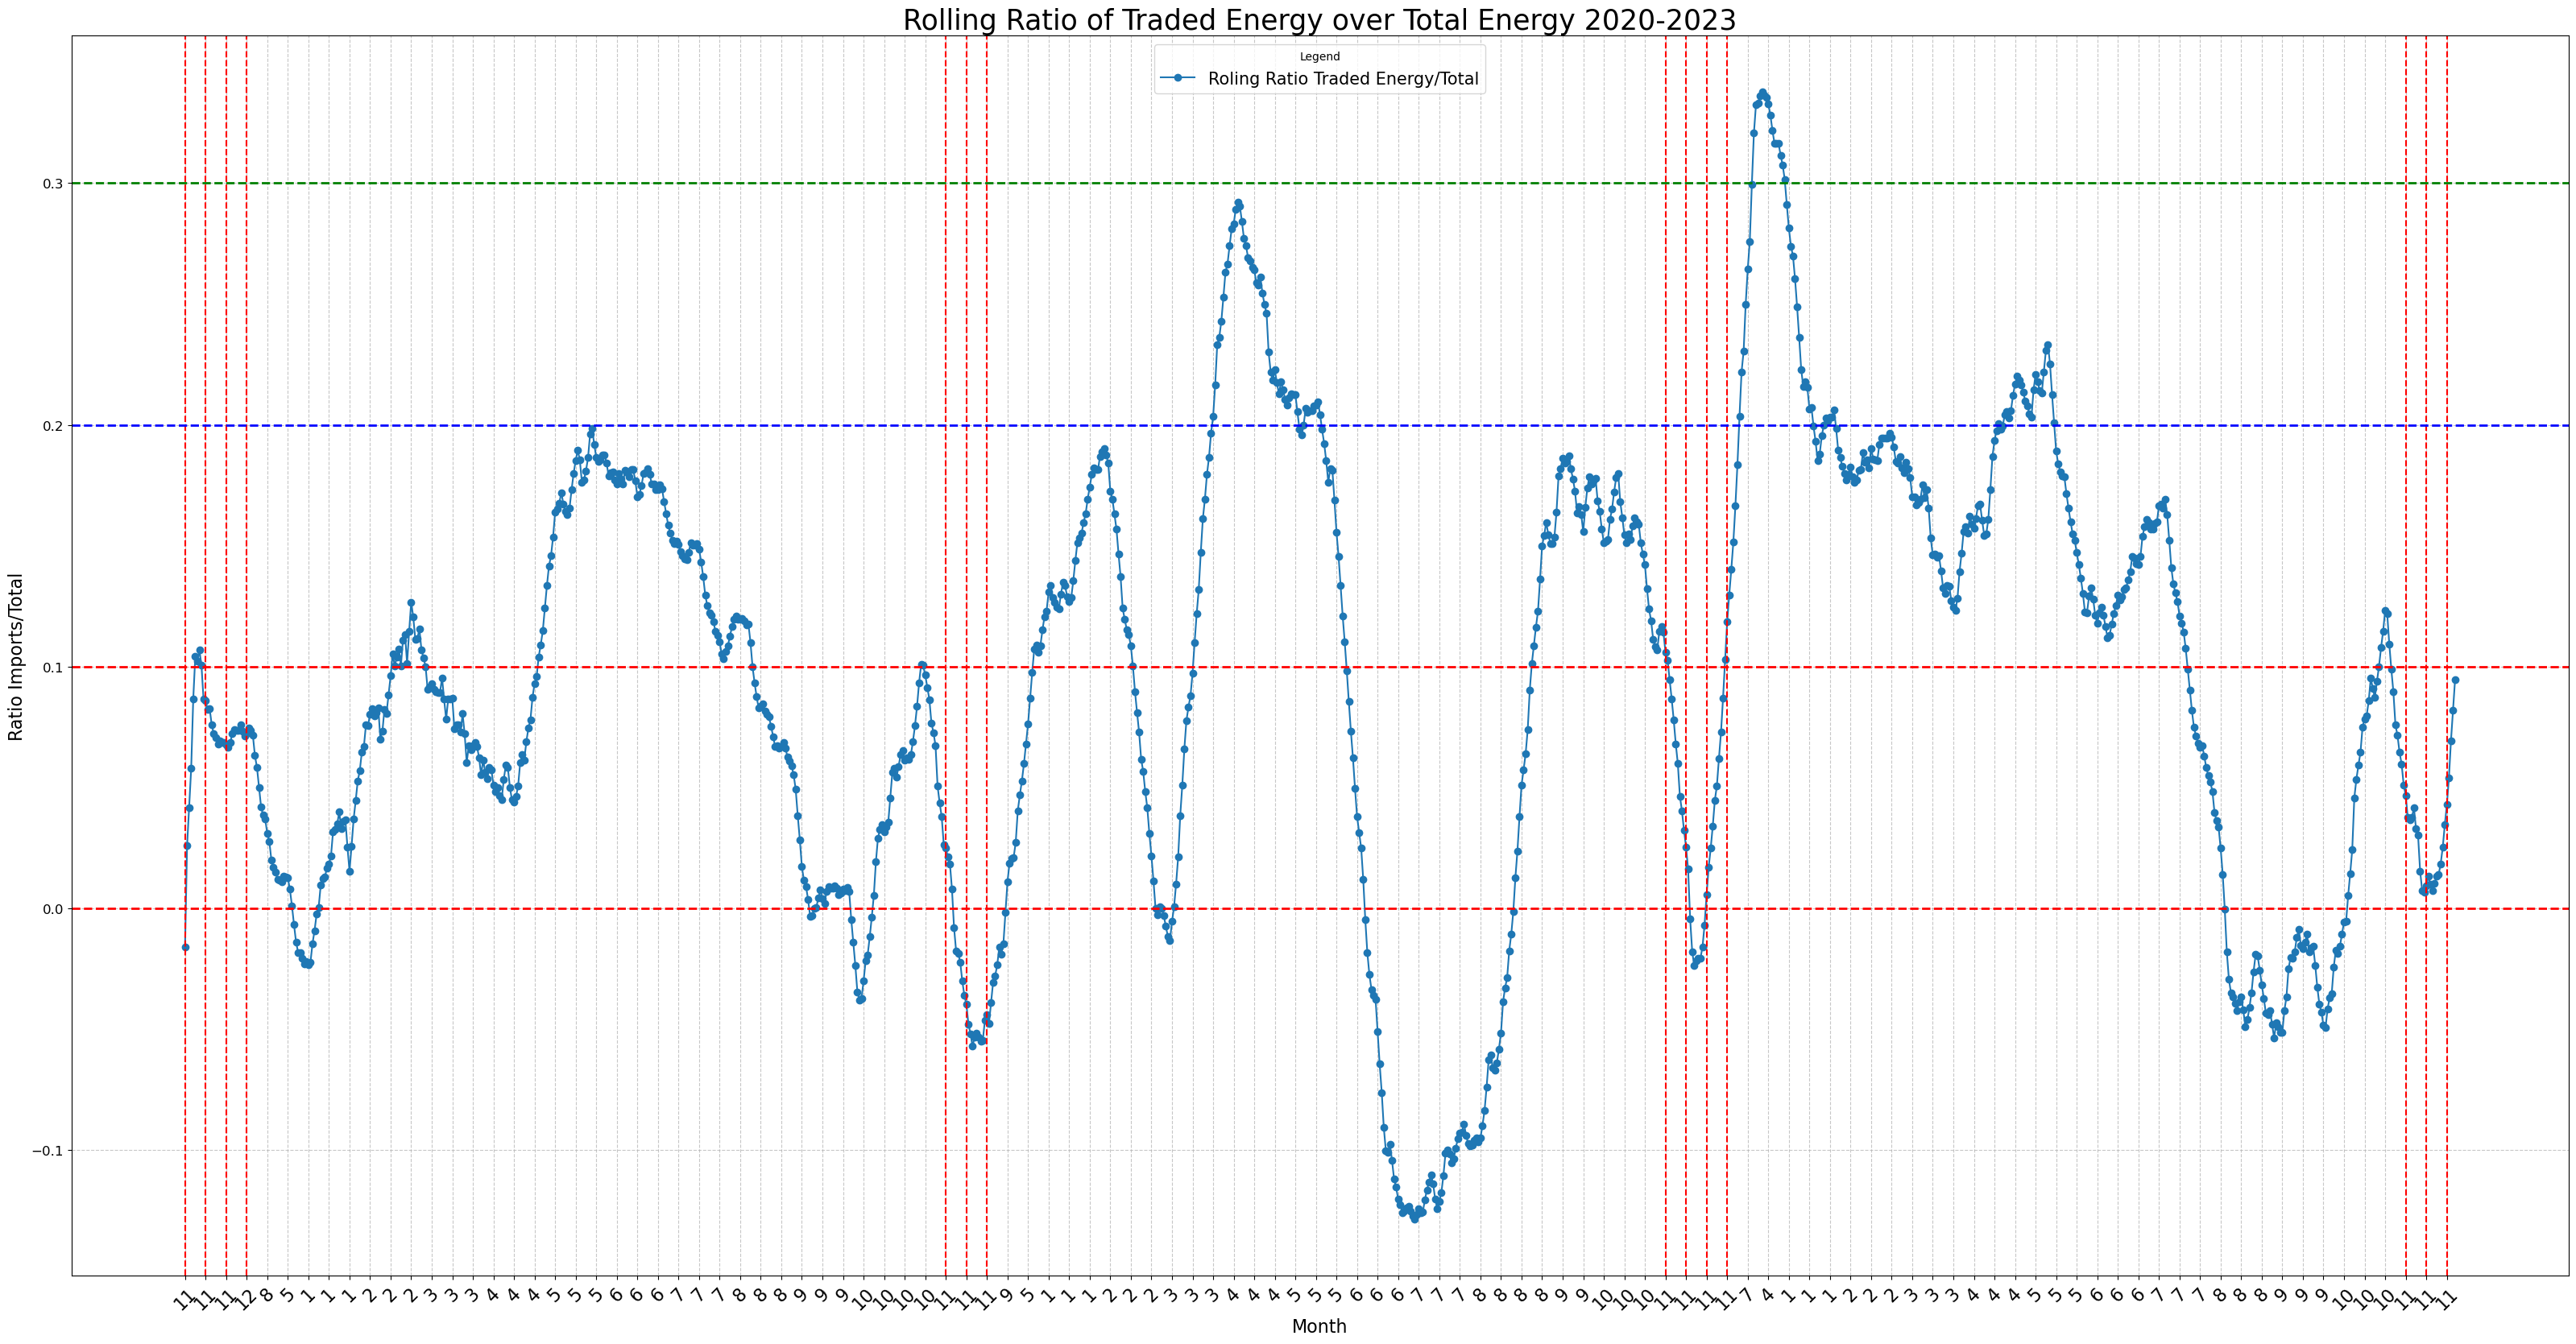

In [27]:
plt.figure(figsize=(40, 20))  
plt.plot(ratio.index, ratio['rolling_ratio'], marker='o')

# Adding titles and labels
plt.title('Rolling Ratio of Traded Energy over Total Energy 2020-2023', fontsize=25)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Ratio Imports/Total', fontsize=16)

# Set x-ticks to show every 5th day
ticks = scaled_rolling_table.index[::10]  # Take every 10th index to avoind crouding the x-axis

labels = scaled_rolling_table['month'].iloc[::10]  # Corresponding labels

plt.xticks(
    ticks=ticks,  # Positions for the ticks
    labels=labels,  # Labels for the ticks
    rotation=45,  # Rotate labels for better readability
    fontsize=16
)

plt.yticks(fontsize=12)

# Draw vertical red lines for ticks with label '12'
for tick, label in zip(ticks, labels):
    if label == 12 or label == 11:
        plt.axvline(x=tick, color='red', linestyle='--', linewidth=1.5)

# Display grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Legend', labels=['Roling Ratio Traded Energy/Total'], fontsize=15)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)   
plt.axhline(y=0.1, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=0.2, color='blue', linestyle='--', linewidth=2)  
plt.axhline(y=0.3, color='green', linestyle='--', linewidth=2)  


plt.savefig('energy_ratio_net_total.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
# Show the plot
plt.show()


In the graph above we see that  the Ratio of traded energy over total energy is mostly positive. This means that most of the time Greece buys energy from traders instead of selling any surplus.

The 2 red horizontal lines depict 10% of the total energy bought whereas the blue horizontal line depicts the 20% of total energy bought.

- We clearly see that Greece buy more energy with each passing year
- In 2021 more than half of the year and a quarter of the year 10% and 20% of the total energy was purchased from traders.
- In 2022 about half of the year more than 10% of the total energy the country consumed was bought from traders.
- In 2023 the percentage of energy bought surpassed 30%

These increases in energy bought can be higly linked to the increase in product prices.
Such increases could be cause the increase in market prices because energy is needed to produce products. Therefore, the increases in can quite directly cause the increase of product prices.